# "backtesting crypto hourly intervals"
> "How to fetch and backtest crypto data using fastquant"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jerome de Leon (original), Mikee Jazmines (hourly)
- categories: [crypto, backtest, grid search]

<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/2020-05-20-backtest_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment to install in colab
# !pip3 install fastquant --update
# or pip install git+https://www.github.com/enzoampil/fastquant.git@history

## fetch data from binance

### If a timestamp is given, it will return upto that timestamp

In [ ]:
from fastquant import get_crypto_data

In [5]:
crypto = get_crypto_data("BTC/USDT", 
                         "2020-11-01 00:00:00", 
                         "2021-11-30 05:00:00",
                         time_resolution='1h'
                        )

In [6]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-11-30 01:00:00,57707.38,57775.70,57036.54,57260.06,2307.00578
2021-11-30 02:00:00,57260.05,57512.41,57215.13,57357.85,1058.06476
2021-11-30 03:00:00,57357.86,57414.11,56770.01,57092.92,1577.44633
2021-11-30 04:00:00,57092.91,57277.33,56983.97,57205.00,928.50736
2021-11-30 05:00:00,57205.00,57282.11,56280.37,56286.07,1646.18148


### If no timestamp is given, it will return upto 00:00:00

In [7]:
crypto = get_crypto_data("BTC/USDT", 
                         "2020-11-01", 
                         "2021-11-30",
                         time_resolution='1h'
                        )

In [8]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-11-29 20:00:00,57880.67,58249.99,57703.57,58038.63,1210.67577
2021-11-29 21:00:00,58034.21,58400.00,57987.82,58247.18,1430.54047
2021-11-29 22:00:00,58247.17,58353.01,58020.25,58048.28,1303.51091
2021-11-29 23:00:00,58048.27,58099.64,57667.00,57776.25,1203.66000
2021-11-30 00:00:00,57776.25,57964.18,57515.38,57707.38,1404.65505


## run backtest with a grid of values

In [9]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [10]:
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,2,100000,1,1,False,0,0,0,0,close,...,47,67,11002.162979,11.002163,-4879.040000,-4.879040,44452.86,44.45286,-20958.42,-20.95842
1,0,100000,1,1,False,0,0,0,0,close,...,80,127,9914.955250,9.914955,-4755.445748,-4.755446,41070.12,41.07012,-14097.00,-14.09700
2,3,100000,1,1,False,0,0,0,0,close,...,32,56,15546.610625,15.546611,-5427.451607,-5.427452,52285.66,52.28566,-22280.58,-22.28058
3,1,100000,1,1,False,0,0,0,0,close,...,56,98,11869.059464,11.869059,-4863.816327,-4.863816,43645.77,43.64577,-20649.60,-20.64960
4,11,100000,1,1,False,0,0,0,0,close,...,30,37,13528.385333,13.528385,-7040.034324,-7.040034,41067.54,41.06754,-22302.12,-22.30212


That's a 258% maximum profit using only SMAC because bitcoin was bullish all time long!

In [11]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 60)

## run backtest using optimum values

In [12]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

<IPython.core.display.Javascript object>


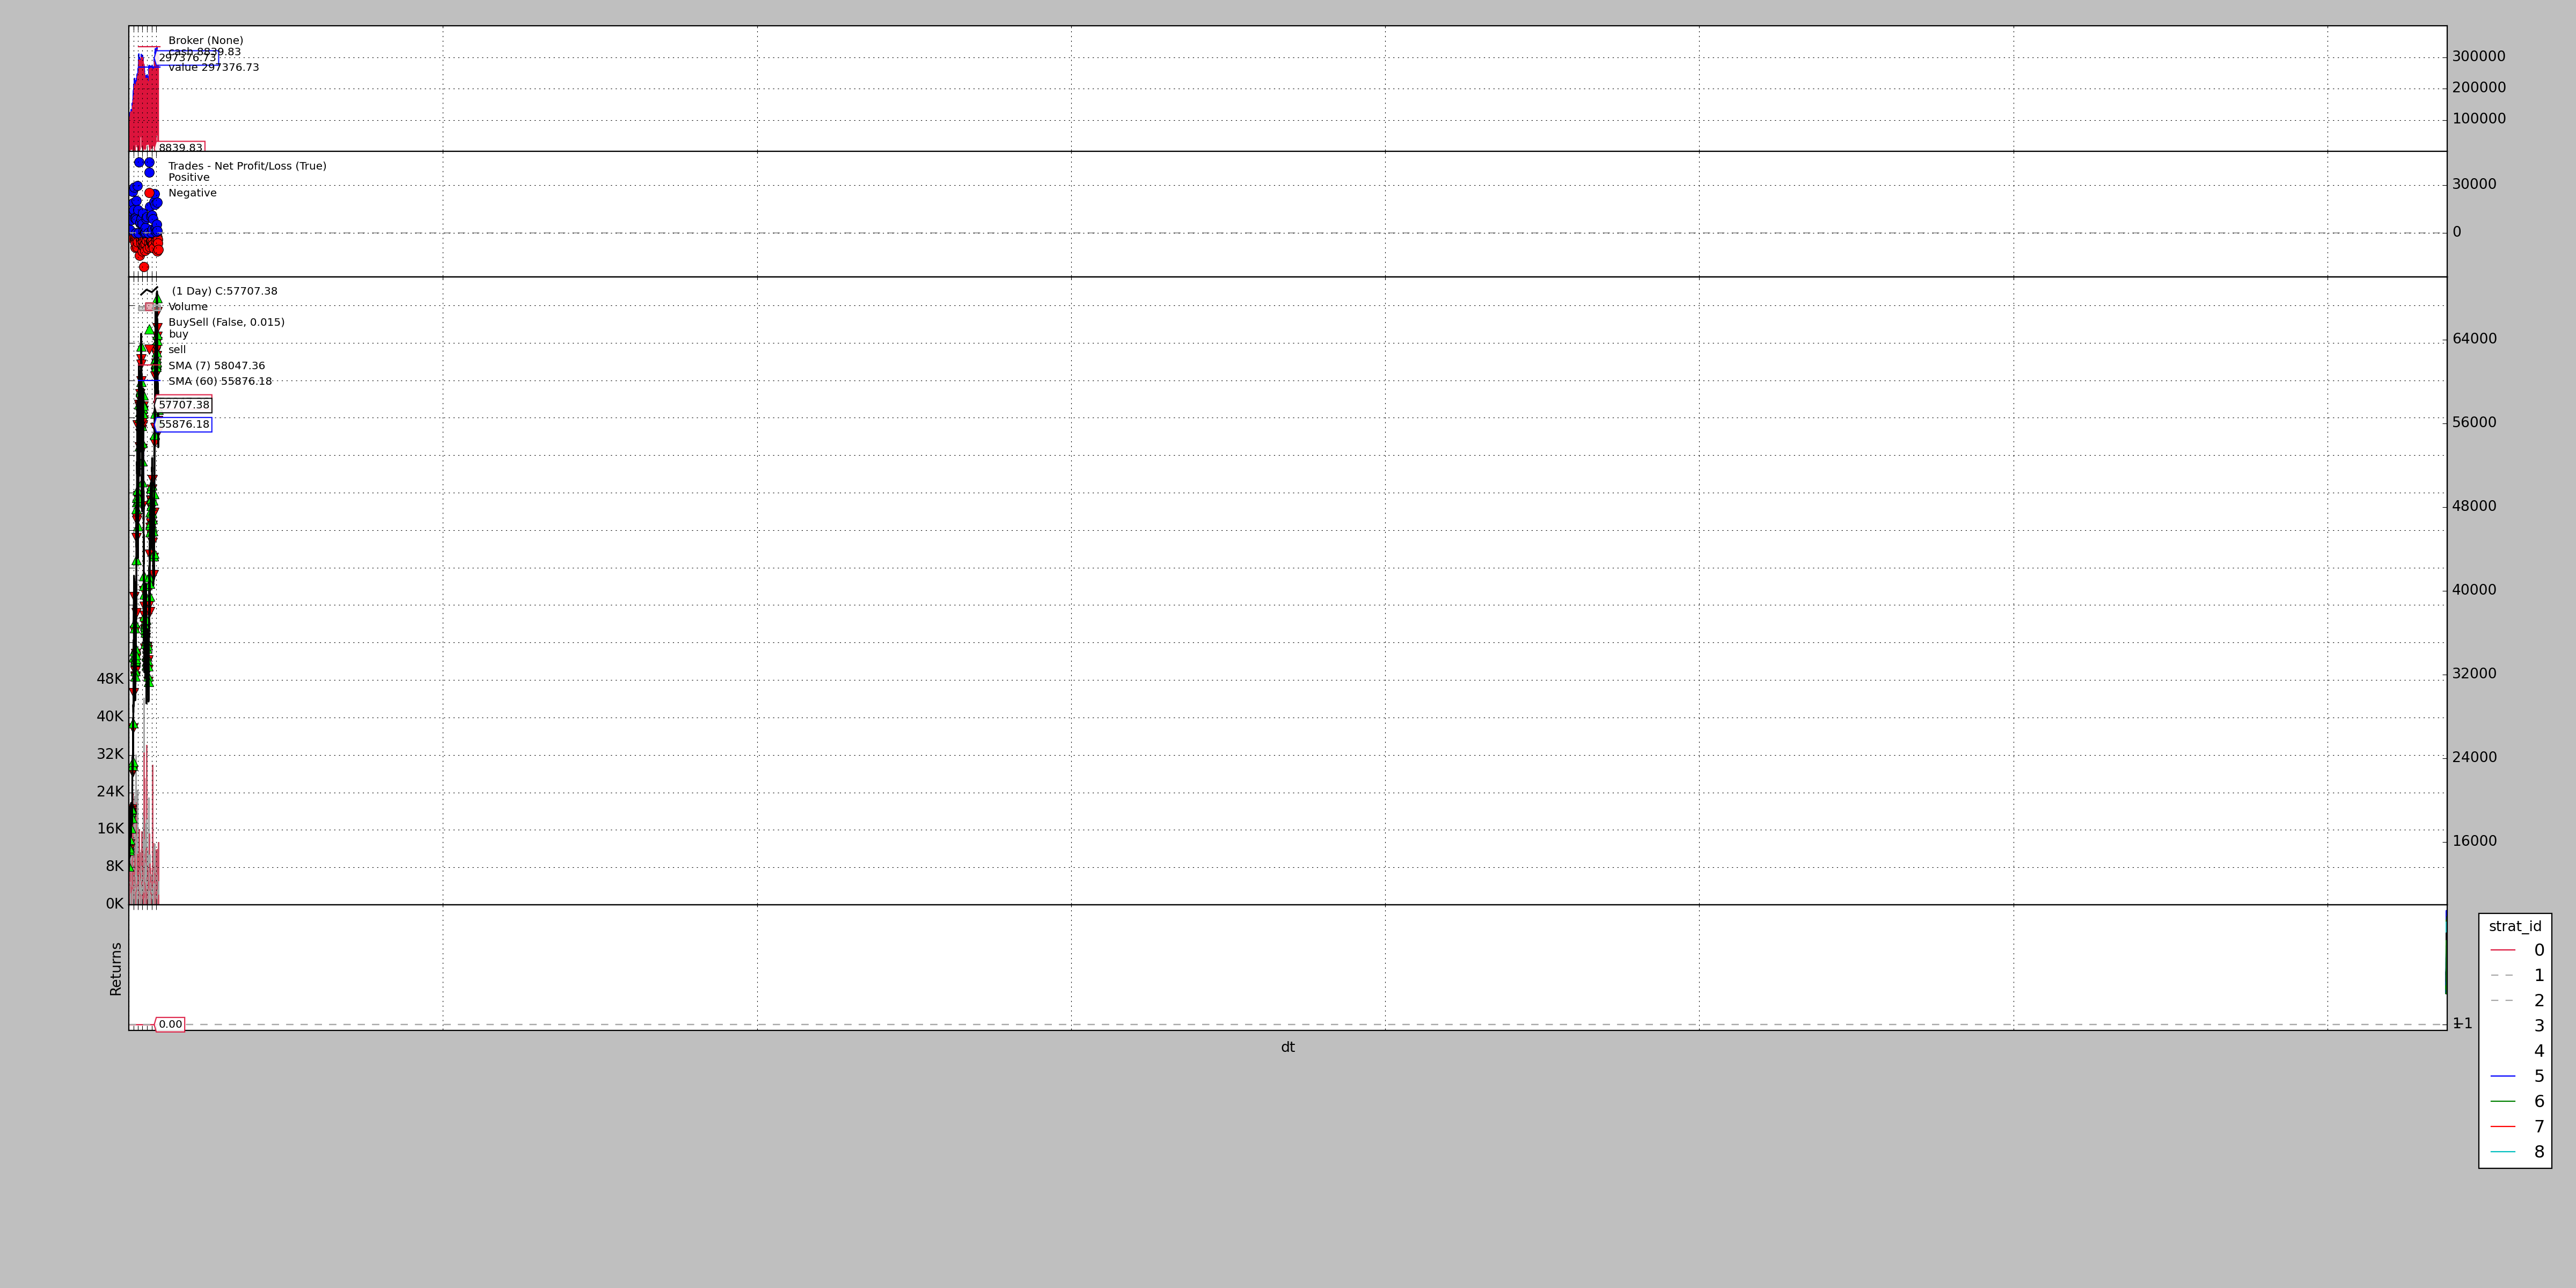

In [13]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## accessing history of transactions

This is done by setting `return_history`=True.

### single strategy

In [14]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [15]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,47,67,11002.162979,11.002163,-4879.04,-4.87904,44452.86,44.45286,-20958.42,-20.95842


In [16]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [17]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period60,2020-11-03 17:00:00,buy,13716.87,7,96018.09,0.0,0.00
1,0,fast_period7_slow_period60,2020-11-07 19:00:00,sell,14927.95,-7,96018.09,0.0,8477.56
2,0,fast_period7_slow_period60,2020-11-08 18:00:00,buy,15574.19,6,93445.14,0.0,0.00
3,0,fast_period7_slow_period60,2020-11-09 19:00:00,sell,15317.51,-6,93445.14,0.0,-1540.08
4,0,fast_period7_slow_period60,2020-11-09 23:00:00,buy,15242.61,7,106698.27,0.0,0.00
...,...,...,...,...,...,...,...,...,...
224,0,fast_period7_slow_period60,2021-11-23 23:00:00,buy,57561.23,5,287806.15,0.0,0.00
225,0,fast_period7_slow_period60,2021-11-24 03:00:00,sell,56258.79,-5,287806.15,0.0,-6512.20
226,0,fast_period7_slow_period60,2021-11-24 22:00:00,buy,57308.82,5,286544.10,0.0,0.00
227,0,fast_period7_slow_period60,2021-11-26 09:00:00,sell,55210.90,-5,286544.10,0.0,-10489.60


The final value in `results` can be calculated from the `commission` and `pnl` (profit & loss) of all the closed (bought and sold) transactions in history:

In [18]:
r = results.squeeze()
r.final_value

297376.7300000001

In [19]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

290205.98

### single signal strategy with grid search

In [20]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [21]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

In [22]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

### multi signal strategy

In [23]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2020-11-02T08:00:00, BUY CREATE, 13446.65
2020-11-02T08:00:00, Cash: 100000.0
2020-11-02T08:00:00, Price: 13446.65
2020-11-02T08:00:00, Buy prop size: 7.429367158370294
2020-11-02T08:00:00, Afforded size: 7.429367158370294
2020-11-02T08:00:00, Final siz

2020-12-08T22:00:00, Afforded size: 5.974611549526724
2020-12-08T22:00:00, Final size: 5
2020-12-08T23:00:00, BUY EXECUTED, Price: 18340.01, Cost: 91700.05, Comm: 0.00, Size: 5.00
2020-12-09T07:00:00, BUY CREATE, 17924.07
2020-12-09T07:00:00, Cash: 17983.96000000002
2020-12-09T07:00:00, Price: 17924.07
2020-12-09T07:00:00, Buy prop size: 1.0023389780331158
2020-12-09T07:00:00, Afforded size: 1.0023389780331158
2020-12-09T07:00:00, Final size: 1
2020-12-09T08:00:00, BUY EXECUTED, Price: 17924.07, Cost: 17924.07, Comm: 0.00, Size: 1.00
2020-12-12T19:00:00, SELL CREATE, 18770.68
2020-12-12T20:00:00, SELL EXECUTED, Price: 18805.29, Cost: 109624.12, Comm: 0.00, Size: -6.00
2020-12-12T20:00:00, OPERATION PROFIT, GROSS: 3207.62, NET: 3207.62
2020-12-21T10:00:00, BUY CREATE, 22445.99
2020-12-21T10:00:00, Cash: 112891.63000000003
2020-12-21T10:00:00, Price: 22445.99
2020-12-21T10:00:00, Buy prop size: 5.024454307822965
2020-12-21T10:00:00, Afforded size: 5.024454307822965
2020-12-21T10:00:00, F

2021-02-08T12:00:00, BUY CREATE, 42984.07
2021-02-08T12:00:00, Cash: 172458.43999999994
2021-02-08T12:00:00, Price: 42984.07
2021-02-08T12:00:00, Buy prop size: 4.008139616517323
2021-02-08T12:00:00, Afforded size: 4.008139616517323
2021-02-08T12:00:00, Final size: 4
2021-02-08T13:00:00, BUY EXECUTED, Price: 42984.07, Cost: 171936.28, Comm: 0.00, Size: 4.00
2021-02-08T13:00:00, SELL CREATE, 43558.73
2021-02-08T14:00:00, SELL EXECUTED, Price: 42897.12, Cost: 171936.28, Comm: 0.00, Size: -4.00
2021-02-11T14:00:00, BUY CREATE, 47864.81
2021-02-11T14:00:00, Cash: 172110.63999999996
2021-02-11T14:00:00, Price: 47864.81
2021-02-11T14:00:00, Buy prop size: 3.592173484000068
2021-02-11T14:00:00, Afforded size: 3.592173484000068
2021-02-11T14:00:00, Final size: 3
2021-02-11T15:00:00, BUY EXECUTED, Price: 47864.81, Cost: 143594.43, Comm: 0.00, Size: 3.00
2021-02-11T15:00:00, SELL CREATE, 47590.53
2021-02-11T16:00:00, SELL EXECUTED, Price: 47960.85, Cost: 143594.43, Comm: 0.00, Size: -3.00
2021-0

2021-05-07T04:00:00, SELL CREATE, 55795.36
2021-05-07T05:00:00, SELL EXECUTED, Price: 55830.90, Cost: 165875.13, Comm: 0.00, Size: -3.00
2021-05-07T13:00:00, BUY CREATE, 56997.47
2021-05-07T13:00:00, Cash: 201135.3999999999
2021-05-07T13:00:00, Price: 56997.47
2021-05-07T13:00:00, Buy prop size: 3.525322536850591
2021-05-07T13:00:00, Afforded size: 3.525322536850591
2021-05-07T13:00:00, Final size: 3
2021-05-07T14:00:00, BUY EXECUTED, Price: 56997.47, Cost: 170992.41, Comm: 0.00, Size: 3.00
2021-05-09T13:00:00, SELL CREATE, 57170.90
2021-05-09T14:00:00, SELL EXECUTED, Price: 57220.02, Cost: 170992.41, Comm: 0.00, Size: -3.00
2021-05-10T01:00:00, BUY CREATE, 58700.21
2021-05-10T01:00:00, Cash: 201803.0499999999
2021-05-10T01:00:00, Price: 58700.21
2021-05-10T01:00:00, Buy prop size: 3.4344246562567404
2021-05-10T01:00:00, Afforded size: 3.4344246562567404
2021-05-10T01:00:00, Final size: 3
2021-05-10T02:00:00, BUY EXECUTED, Price: 58700.21, Cost: 176100.63, Comm: 0.00, Size: 3.00
2021-0

2021-07-03T07:00:00, BUY CREATE, 34499.54
2021-07-03T07:00:00, Cash: 157835.95999999996
2021-07-03T07:00:00, Price: 34499.54
2021-07-03T07:00:00, Buy prop size: 4.570445916620386
2021-07-03T07:00:00, Afforded size: 4.570445916620386
2021-07-03T07:00:00, Final size: 4
2021-07-03T08:00:00, BUY EXECUTED, Price: 34499.54, Cost: 137998.16, Comm: 0.00, Size: 4.00
2021-07-04T05:00:00, SELL CREATE, 35413.45
2021-07-04T06:00:00, SELL EXECUTED, Price: 35205.94, Cost: 137998.16, Comm: 0.00, Size: -4.00
2021-07-05T11:00:00, BUY CREATE, 33379.96
2021-07-05T11:00:00, Cash: 160661.55999999997
2021-07-05T11:00:00, Price: 33379.96
2021-07-05T11:00:00, Buy prop size: 4.8083059099249645
2021-07-05T11:00:00, Afforded size: 4.8083059099249645
2021-07-05T11:00:00, Final size: 4
2021-07-05T12:00:00, BUY EXECUTED, Price: 33379.96, Cost: 133519.84, Comm: 0.00, Size: 4.00
2021-07-08T00:00:00, SELL CREATE, 33300.48
2021-07-08T01:00:00, SELL EXECUTED, Price: 33210.45, Cost: 133519.84, Comm: 0.00, Size: -4.00
2021

2021-09-14T07:00:00, BUY CREATE, 45720.02
2021-09-14T07:00:00, Cash: 188127.17
2021-09-14T07:00:00, Price: 45720.02
2021-09-14T07:00:00, Buy prop size: 4.110655042784995
2021-09-14T07:00:00, Afforded size: 4.110655042784995
2021-09-14T07:00:00, Final size: 4
2021-09-14T08:00:00, BUY EXECUTED, Price: 45720.02, Cost: 182880.08, Comm: 0.00, Size: 4.00
2021-09-15T15:00:00, SELL CREATE, 48056.51
2021-09-15T16:00:00, SELL EXECUTED, Price: 48288.00, Cost: 182880.08, Comm: 0.00, Size: -4.00
2021-09-18T05:00:00, BUY CREATE, 48678.99
2021-09-18T05:00:00, Cash: 198399.09000000003
2021-09-18T05:00:00, Price: 48678.99
2021-09-18T05:00:00, Buy prop size: 4.071590004453444
2021-09-18T05:00:00, Afforded size: 4.071590004453444
2021-09-18T05:00:00, Final size: 4
2021-09-18T06:00:00, BUY EXECUTED, Price: 48678.99, Cost: 194715.96, Comm: 0.00, Size: 4.00
2021-09-19T12:00:00, SELL CREATE, 47325.46
2021-09-19T13:00:00, SELL EXECUTED, Price: 47274.52, Cost: 194715.96, Comm: 0.00, Size: -4.00
2021-09-20T02:0

In [24]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,...,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,...,10,1,9132.99,9.13299,-680.88,-0.68088,25183.66,25.18366,-680.88,-0.68088


In [25]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [26]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2020-11-03T12:00:00, BUY CREATE, 13514.68
2020-11-03T12:00:00, Cash: 100000.0
2020-11-03T12:00:00, Price: 13514.68
2020-11-03T12:00:00, Buy prop size: 7.39196931781588
2020-11-03T12:00:00, Afforded size: 7.39196931781588
2020-11-03T12:00:00, Final size:

2020-12-16T10:00:00, SELL CREATE, 19739.78
2020-12-16T11:00:00, SELL EXECUTED, Price: 19798.17, Cost: 96457.00, Comm: 0.00, Size: -5.00
2020-12-19T00:00:00, BUY CREATE, 22954.02
2020-12-19T00:00:00, Cash: 116391.34
2020-12-19T00:00:00, Price: 22954.02
2020-12-19T00:00:00, Buy prop size: 5.065564329693228
2020-12-19T00:00:00, Afforded size: 5.065564329693228
2020-12-19T00:00:00, Final size: 5
2020-12-19T01:00:00, BUY EXECUTED, Price: 22954.02, Cost: 114770.10, Comm: 0.00, Size: 5.00
2020-12-19T16:00:00, SELL CREATE, 23886.44
2020-12-19T17:00:00, SELL EXECUTED, Price: 23966.48, Cost: 114770.10, Comm: 0.00, Size: -5.00
2020-12-22T14:00:00, BUY CREATE, 23439.99
2020-12-22T14:00:00, Cash: 121453.63999999998
2020-12-22T14:00:00, Price: 23439.99
2020-12-22T14:00:00, Buy prop size: 5.176295198603228
2020-12-22T14:00:00, Afforded size: 5.176295198603228
2020-12-22T14:00:00, Final size: 5
2020-12-22T15:00:00, BUY EXECUTED, Price: 23439.99, Cost: 117199.95, Comm: 0.00, Size: 5.00
2020-12-23T00:00

2021-02-05T08:00:00, BUY CREATE, 37705.27
2021-02-05T08:00:00, Cash: 162190.23
2021-02-05T08:00:00, Price: 37705.27
2021-02-05T08:00:00, Buy prop size: 4.297229586161347
2021-02-05T08:00:00, Afforded size: 4.297229586161347
2021-02-05T08:00:00, Final size: 4
2021-02-05T09:00:00, BUY EXECUTED, Price: 37705.27, Cost: 150821.08, Comm: 0.00, Size: 4.00
2021-02-06T02:00:00, SELL CREATE, 39384.74
2021-02-06T03:00:00, SELL EXECUTED, Price: 39382.10, Cost: 150821.08, Comm: 0.00, Size: -4.00
2021-02-08T08:00:00, BUY CREATE, 39175.38
2021-02-08T08:00:00, Cash: 168897.55000000002
2021-02-08T08:00:00, Price: 39175.38
2021-02-08T08:00:00, Buy prop size: 4.307011729785933
2021-02-08T08:00:00, Afforded size: 4.307011729785933
2021-02-08T08:00:00, Final size: 4
2021-02-08T09:00:00, BUY EXECUTED, Price: 39175.38, Cost: 156701.52, Comm: 0.00, Size: 4.00
2021-02-08T12:00:00, SELL CREATE, 42897.12
2021-02-08T13:00:00, SELL EXECUTED, Price: 42984.07, Cost: 156701.52, Comm: 0.00, Size: -4.00
2021-02-11T12:0

2021-03-11T15:00:00, BUY CREATE, 56347.19
2021-03-11T15:00:00, Cash: 209973.71
2021-03-11T15:00:00, Price: 56347.19
2021-03-11T15:00:00, Buy prop size: 3.7227046469210987
2021-03-11T15:00:00, Afforded size: 3.7227046469210987
2021-03-11T15:00:00, Final size: 3
2021-03-11T16:00:00, BUY EXECUTED, Price: 56347.19, Cost: 169041.57, Comm: 0.00, Size: 3.00
2021-03-12T12:00:00, SELL CREATE, 55689.99
2021-03-12T13:00:00, SELL EXECUTED, Price: 56386.89, Cost: 169041.57, Comm: 0.00, Size: -3.00
2021-03-12T20:00:00, BUY CREATE, 56696.80
2021-03-12T20:00:00, Cash: 210092.80999999997
2021-03-12T20:00:00, Price: 56696.8
2021-03-12T20:00:00, Buy prop size: 3.701847848078323
2021-03-12T20:00:00, Afforded size: 3.701847848078323
2021-03-12T20:00:00, Final size: 3
2021-03-12T21:00:00, BUY EXECUTED, Price: 56696.80, Cost: 170090.40, Comm: 0.00, Size: 3.00
2021-03-13T01:00:00, SELL CREATE, 56473.41
2021-03-13T02:00:00, SELL EXECUTED, Price: 56386.39, Cost: 170090.40, Comm: 0.00, Size: -3.00
2021-03-13T08:

2021-04-17T03:00:00, BUY CREATE, 62372.27
2021-04-17T03:00:00, Cash: 201249.07999999996
2021-04-17T03:00:00, Price: 62372.27
2021-04-17T03:00:00, Buy prop size: 3.2233560197188904
2021-04-17T03:00:00, Afforded size: 3.2233560197188904
2021-04-17T03:00:00, Final size: 3
2021-04-17T04:00:00, BUY EXECUTED, Price: 62372.27, Cost: 187116.81, Comm: 0.00, Size: 3.00
2021-04-17T14:00:00, SELL CREATE, 60264.66
2021-04-17T15:00:00, SELL EXECUTED, Price: 60610.97, Cost: 187116.81, Comm: 0.00, Size: -3.00
2021-04-18T03:00:00, BUY CREATE, 55014.46
2021-04-18T03:00:00, Cash: 195965.17999999996
2021-04-18T03:00:00, Price: 55014.46
2021-04-18T03:00:00, Buy prop size: 3.5585082647255026
2021-04-18T03:00:00, Afforded size: 3.5585082647255026
2021-04-18T03:00:00, Final size: 3
2021-04-18T04:00:00, BUY EXECUTED, Price: 55014.46, Cost: 165043.38, Comm: 0.00, Size: 3.00
2021-04-19T16:00:00, SELL CREATE, 55369.68
2021-04-19T17:00:00, SELL EXECUTED, Price: 54826.99, Cost: 165043.38, Comm: 0.00, Size: -3.00
20

2021-05-23T05:00:00, SELL CREATE, 36650.38
2021-05-23T06:00:00, SELL EXECUTED, Price: 36883.04, Cost: 189042.40, Comm: 0.00, Size: -5.00
2021-05-24T05:00:00, BUY CREATE, 35292.60
2021-05-24T05:00:00, Cash: 189343.95999999988
2021-05-24T05:00:00, Price: 35292.6
2021-05-24T05:00:00, Buy prop size: 5.359616610700405
2021-05-24T05:00:00, Afforded size: 5.359616610700405
2021-05-24T05:00:00, Final size: 5
2021-05-24T06:00:00, BUY EXECUTED, Price: 35292.60, Cost: 176463.00, Comm: 0.00, Size: 5.00
2021-05-24T19:00:00, SELL CREATE, 38951.00
2021-05-24T20:00:00, SELL EXECUTED, Price: 39606.10, Cost: 176463.00, Comm: 0.00, Size: -5.00
2021-05-26T02:00:00, BUY CREATE, 39212.14
2021-05-26T02:00:00, Cash: 210911.45999999988
2021-05-26T02:00:00, Price: 39212.14
2021-05-26T02:00:00, Buy prop size: 5.37335527315671
2021-05-26T02:00:00, Afforded size: 5.37335527315671
2021-05-26T02:00:00, Final size: 5
2021-05-26T03:00:00, BUY EXECUTED, Price: 39212.14, Cost: 196060.70, Comm: 0.00, Size: 5.00
2021-05-2

2021-07-02T16:00:00, BUY CREATE, 33597.07
2021-07-02T16:00:00, Cash: 199564.70999999996
2021-07-02T16:00:00, Price: 33597.07
2021-07-02T16:00:00, Buy prop size: 5.934009860245094
2021-07-02T16:00:00, Afforded size: 5.934009860245094
2021-07-02T16:00:00, Final size: 5
2021-07-02T17:00:00, BUY EXECUTED, Price: 33597.07, Cost: 167985.35, Comm: 0.00, Size: 5.00
2021-07-04T05:00:00, SELL CREATE, 35413.45
2021-07-04T06:00:00, SELL EXECUTED, Price: 35205.94, Cost: 167985.35, Comm: 0.00, Size: -5.00
2021-07-06T05:00:00, BUY CREATE, 34793.39
2021-07-06T05:00:00, Cash: 207609.05999999997
2021-07-06T05:00:00, Price: 34793.39
2021-07-06T05:00:00, Buy prop size: 5.960950006356332
2021-07-06T05:00:00, Afforded size: 5.960950006356332
2021-07-06T05:00:00, Final size: 5
2021-07-06T06:00:00, BUY EXECUTED, Price: 34793.39, Cost: 173966.95, Comm: 0.00, Size: 5.00
2021-07-06T19:00:00, SELL CREATE, 33953.78
2021-07-06T20:00:00, SELL EXECUTED, Price: 34019.99, Cost: 173966.95, Comm: 0.00, Size: -5.00
2021-0

2021-08-11T05:00:00, BUY CREATE, 45800.00
2021-08-11T05:00:00, Cash: 213956.70999999988
2021-08-11T05:00:00, Price: 45800.0
2021-08-11T05:00:00, Buy prop size: 4.666877009453426
2021-08-11T05:00:00, Afforded size: 4.666877009453426
2021-08-11T05:00:00, Final size: 4
2021-08-11T06:00:00, BUY EXECUTED, Price: 45800.00, Cost: 183200.00, Comm: 0.00, Size: 4.00
2021-08-12T02:00:00, SELL CREATE, 45927.00
2021-08-12T03:00:00, SELL EXECUTED, Price: 46213.96, Cost: 183200.00, Comm: 0.00, Size: -4.00
2021-08-13T08:00:00, BUY CREATE, 46161.01
2021-08-13T08:00:00, Cash: 215612.54999999987
2021-08-13T08:00:00, Price: 46161.01
2021-08-13T08:00:00, Buy prop size: 4.666214037499455
2021-08-13T08:00:00, Afforded size: 4.666214037499455
2021-08-13T08:00:00, Final size: 4
2021-08-13T09:00:00, BUY EXECUTED, Price: 46161.01, Cost: 184644.04, Comm: 0.00, Size: 4.00
2021-08-13T20:00:00, SELL CREATE, 47556.76
2021-08-13T21:00:00, SELL EXECUTED, Price: 47588.00, Cost: 184644.04, Comm: 0.00, Size: -4.00
2021-08

2021-09-17T05:00:00, BUY CREATE, 48044.84
2021-09-17T05:00:00, Cash: 213331.82999999987
2021-09-17T05:00:00, Price: 48044.84
2021-09-17T05:00:00, Buy prop size: 4.43582934793229
2021-09-17T05:00:00, Afforded size: 4.43582934793229
2021-09-17T05:00:00, Final size: 4
2021-09-17T06:00:00, BUY EXECUTED, Price: 48044.84, Cost: 192179.36, Comm: 0.00, Size: 4.00
2021-09-17T11:00:00, SELL CREATE, 47464.92
2021-09-17T12:00:00, SELL EXECUTED, Price: 47403.56, Cost: 192179.36, Comm: 0.00, Size: -4.00
2021-09-18T05:00:00, BUY CREATE, 48678.99
2021-09-18T05:00:00, Cash: 210766.70999999988
2021-09-18T05:00:00, Price: 48678.99
2021-09-18T05:00:00, Buy prop size: 4.3254010374117
2021-09-18T05:00:00, Afforded size: 4.3254010374117
2021-09-18T05:00:00, Final size: 4
2021-09-18T06:00:00, BUY EXECUTED, Price: 48678.99, Cost: 194715.96, Comm: 0.00, Size: 4.00
2021-09-19T01:00:00, SELL CREATE, 48007.06
2021-09-19T02:00:00, SELL EXECUTED, Price: 47872.86, Cost: 194715.96, Comm: 0.00, Size: -4.00
2021-09-20T1

2021-10-28T09:00:00, BUY CREATE, 61049.57
2021-10-28T09:00:00, Cash: 202187.59999999983
2021-10-28T09:00:00, Price: 61049.57
2021-10-28T09:00:00, Buy prop size: 3.3085509756352787
2021-10-28T09:00:00, Afforded size: 3.3085509756352787
2021-10-28T09:00:00, Final size: 3
2021-10-28T10:00:00, BUY EXECUTED, Price: 61049.57, Cost: 183148.71, Comm: 0.00, Size: 3.00
2021-10-28T13:00:00, SELL CREATE, 61542.14
2021-10-28T14:00:00, SELL EXECUTED, Price: 61590.82, Cost: 183148.71, Comm: 0.00, Size: -3.00
2021-10-29T15:00:00, BUY CREATE, 62299.99
2021-10-29T15:00:00, Cash: 203811.34999999983
2021-10-29T15:00:00, Price: 62299.99
2021-10-29T15:00:00, Buy prop size: 3.2681825832996463
2021-10-29T15:00:00, Afforded size: 3.2681825832996463
2021-10-29T15:00:00, Final size: 3
2021-10-29T16:00:00, BUY EXECUTED, Price: 62299.99, Cost: 186899.97, Comm: 0.00, Size: 3.00
2021-10-30T08:00:00, SELL CREATE, 61417.67
2021-10-30T09:00:00, SELL EXECUTED, Price: 61332.90, Cost: 186899.97, Comm: 0.00, Size: -3.00
20

2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2020-11-02T08:00:00, BUY CREATE, 13446.65
2020-11-02T08:00:00, Cash: 100000.0
2020-11-02T08:00:00, Price: 13446.65
2020-11-02T08:00:00, Buy prop size: 7.429367158370294
2020-11-02T08:00:00, Afforded size: 7.429367158370294
2020-11-02T08:00:00, Final siz

2020-12-11T02:00:00, BUY CREATE, 17804.97
2020-12-11T02:00:00, Cash: 112608.72000000002
2020-12-11T02:00:00, Price: 17804.97
2020-12-11T02:00:00, Buy prop size: 6.318248431546012
2020-12-11T02:00:00, Afforded size: 6.318248431546012
2020-12-11T02:00:00, Final size: 6
2020-12-11T03:00:00, BUY EXECUTED, Price: 17804.97, Cost: 106829.82, Comm: 0.00, Size: 6.00
2020-12-11T03:00:00, OPERATION PROFIT, GROSS: -236.88, NET: -236.88
2020-12-12T19:00:00, SELL CREATE, 18770.68
2020-12-12T20:00:00, SELL EXECUTED, Price: 18805.29, Cost: 106829.82, Comm: 0.00, Size: -6.00
2020-12-14T19:00:00, BUY CREATE, 19175.88
2020-12-14T19:00:00, Cash: 118610.64000000001
2020-12-14T19:00:00, Price: 19175.88
2020-12-14T19:00:00, Buy prop size: 6.179228690007857
2020-12-14T19:00:00, Afforded size: 6.179228690007857
2020-12-14T19:00:00, Final size: 6
2020-12-14T20:00:00, BUY EXECUTED, Price: 19175.88, Cost: 115055.28, Comm: 0.00, Size: 6.00
2020-12-15T10:00:00, SELL CREATE, 19293.54
2020-12-15T11:00:00, SELL EXECUT

2021-01-21T09:00:00, BUY CREATE, 32878.33
2021-01-21T09:00:00, Cash: 182952.15000000002
2021-01-21T09:00:00, Price: 32878.33
2021-01-21T09:00:00, Buy prop size: 5.558961803089775
2021-01-21T09:00:00, Afforded size: 5.558961803089775
2021-01-21T09:00:00, Final size: 5
2021-01-21T10:00:00, BUY EXECUTED, Price: 32878.33, Cost: 164391.65, Comm: 0.00, Size: 5.00
2021-01-23T12:00:00, SELL CREATE, 31865.19
2021-01-23T13:00:00, SELL EXECUTED, Price: 31602.63, Cost: 164391.65, Comm: 0.00, Size: -5.00
2021-01-24T06:00:00, BUY CREATE, 32757.02
2021-01-24T06:00:00, Cash: 176573.65000000002
2021-01-24T06:00:00, Price: 32757.02
2021-01-24T06:00:00, Buy prop size: 5.385021370907757
2021-01-24T06:00:00, Afforded size: 5.385021370907757
2021-01-24T06:00:00, Final size: 5
2021-01-24T07:00:00, BUY EXECUTED, Price: 32757.02, Cost: 163785.10, Comm: 0.00, Size: 5.00
2021-01-24T17:00:00, SELL CREATE, 31831.67
2021-01-24T18:00:00, SELL EXECUTED, Price: 31851.60, Cost: 163785.10, Comm: 0.00, Size: -5.00
2021-0

2021-03-05T18:00:00, BUY CREATE, 48478.11
2021-03-05T18:00:00, Cash: 229566.7
2021-03-05T18:00:00, Price: 48478.11
2021-03-05T18:00:00, Buy prop size: 4.730740588636039
2021-03-05T18:00:00, Afforded size: 4.730740588636039
2021-03-05T18:00:00, Final size: 4
2021-03-05T19:00:00, BUY EXECUTED, Price: 48478.11, Cost: 193912.44, Comm: 0.00, Size: 4.00
2021-03-06T13:00:00, SELL CREATE, 47560.96
2021-03-06T14:00:00, SELL EXECUTED, Price: 47320.30, Cost: 193912.44, Comm: 0.00, Size: -4.00
2021-03-06T23:00:00, BUY CREATE, 48882.20
2021-03-06T23:00:00, Cash: 224935.46000000002
2021-03-06T23:00:00, Price: 48882.2
2021-03-06T23:00:00, Buy prop size: 4.596985185829388
2021-03-06T23:00:00, Afforded size: 4.596985185829388
2021-03-06T23:00:00, Final size: 4
2021-03-07T00:00:00, BUY EXECUTED, Price: 48882.20, Cost: 195528.80, Comm: 0.00, Size: 4.00
2021-03-07T08:00:00, SELL CREATE, 50943.02
2021-03-07T09:00:00, SELL EXECUTED, Price: 50383.09, Cost: 195528.80, Comm: 0.00, Size: -4.00
2021-03-08T16:00:

2021-04-07T11:00:00, BUY CREATE, 56320.47
2021-04-07T11:00:00, Cash: 242267.17999999996
2021-04-07T11:00:00, Price: 56320.47
2021-04-07T11:00:00, Buy prop size: 4.29728577984443
2021-04-07T11:00:00, Afforded size: 4.29728577984443
2021-04-07T11:00:00, Final size: 4
2021-04-07T12:00:00, BUY EXECUTED, Price: 56320.47, Cost: 225281.88, Comm: 0.00, Size: 4.00
2021-04-10T03:00:00, SELL CREATE, 61074.09
2021-04-10T04:00:00, SELL EXECUTED, Price: 59229.50, Cost: 225281.88, Comm: 0.00, Size: -4.00
2021-04-11T03:00:00, BUY CREATE, 60268.58
2021-04-11T03:00:00, Cash: 253903.29999999996
2021-04-11T03:00:00, Price: 60268.58
2021-04-11T03:00:00, Buy prop size: 4.208654830587519
2021-04-11T03:00:00, Afforded size: 4.208654830587519
2021-04-11T03:00:00, Final size: 4
2021-04-11T04:00:00, BUY EXECUTED, Price: 60268.58, Cost: 241074.32, Comm: 0.00, Size: 4.00
2021-04-11T07:00:00, SELL CREATE, 59961.81
2021-04-11T08:00:00, SELL EXECUTED, Price: 59655.49, Cost: 241074.32, Comm: 0.00, Size: -4.00
2021-04-

2021-05-12T18:00:00, BUY CREATE, 54082.52
2021-05-12T18:00:00, Cash: 243360.3799999999
2021-05-12T18:00:00, Price: 54082.52
2021-05-12T18:00:00, Buy prop size: 4.495302044676592
2021-05-12T18:00:00, Afforded size: 4.495302044676592
2021-05-12T18:00:00, Final size: 4
2021-05-12T19:00:00, BUY EXECUTED, Price: 54082.52, Cost: 216330.08, Comm: 0.00, Size: 4.00
2021-05-15T00:00:00, SELL CREATE, 50619.19
2021-05-15T01:00:00, SELL EXECUTED, Price: 49444.70, Cost: 216330.08, Comm: 0.00, Size: -4.00
2021-05-16T08:00:00, BUY CREATE, 48900.02
2021-05-16T08:00:00, Cash: 224809.0999999999
2021-05-16T08:00:00, Price: 48900.02
2021-05-16T08:00:00, Buy prop size: 4.592728499589886
2021-05-16T08:00:00, Afforded size: 4.592728499589886
2021-05-16T08:00:00, Final size: 4
2021-05-16T09:00:00, BUY EXECUTED, Price: 48900.02, Cost: 195600.08, Comm: 0.00, Size: 4.00
2021-05-16T17:00:00, SELL CREATE, 45380.56
2021-05-16T18:00:00, SELL EXECUTED, Price: 47081.50, Cost: 195600.08, Comm: 0.00, Size: -4.00
2021-05-

2021-06-13T12:00:00, BUY CREATE, 35886.14
2021-06-13T12:00:00, Cash: 218101.42
2021-06-13T12:00:00, Price: 35886.14
2021-06-13T12:00:00, Buy prop size: 6.071523336406103
2021-06-13T12:00:00, Afforded size: 6.071523336406103
2021-06-13T12:00:00, Final size: 6
2021-06-13T13:00:00, BUY EXECUTED, Price: 35886.14, Cost: 215316.84, Comm: 0.00, Size: 6.00
2021-06-13T17:00:00, SELL CREATE, 37493.87
2021-06-13T18:00:00, SELL EXECUTED, Price: 37300.00, Cost: 215316.84, Comm: 0.00, Size: -6.00
2021-06-15T17:00:00, BUY CREATE, 40702.95
2021-06-15T17:00:00, Cash: 226584.58000000002
2021-06-15T17:00:00, Price: 40702.95
2021-06-15T17:00:00, Buy prop size: 5.561223984458665
2021-06-15T17:00:00, Afforded size: 5.561223984458665
2021-06-15T17:00:00, Final size: 5
2021-06-15T18:00:00, BUY EXECUTED, Price: 40702.95, Cost: 203514.75, Comm: 0.00, Size: 5.00
2021-06-16T00:00:00, SELL CREATE, 40089.63
2021-06-16T01:00:00, SELL EXECUTED, Price: 39880.03, Cost: 203514.75, Comm: 0.00, Size: -5.00
2021-06-17T10:0

2021-07-21T09:00:00, SELL CREATE, 31385.15
2021-07-21T10:00:00, SELL EXECUTED, Price: 31314.20, Cost: 214992.05, Comm: 0.00, Size: -7.00
2021-07-23T22:00:00, BUY CREATE, 33135.86
2021-07-23T22:00:00, Cash: 234775.32000000004
2021-07-23T22:00:00, Price: 33135.86
2021-07-23T22:00:00, Buy prop size: 7.078155787137539
2021-07-23T22:00:00, Afforded size: 7.078155787137539
2021-07-23T22:00:00, Final size: 7
2021-07-23T23:00:00, BUY EXECUTED, Price: 33135.86, Cost: 231951.02, Comm: 0.00, Size: 7.00
2021-07-23T23:00:00, SELL CREATE, 33554.46
2021-07-24T00:00:00, SELL EXECUTED, Price: 33634.09, Cost: 231951.02, Comm: 0.00, Size: -7.00
2021-07-27T15:00:00, BUY CREATE, 38209.58
2021-07-27T15:00:00, Cash: 238262.93000000002
2021-07-27T15:00:00, Price: 38209.58
2021-07-27T15:00:00, Buy prop size: 6.229456201688297
2021-07-27T15:00:00, Afforded size: 6.229456201688297
2021-07-27T15:00:00, Final size: 6
2021-07-27T16:00:00, BUY EXECUTED, Price: 38209.58, Cost: 229257.48, Comm: 0.00, Size: 6.00
2021-0

2021-08-27T07:00:00, BUY CREATE, 47483.44
2021-08-27T07:00:00, Cash: 258507.06999999995
2021-08-27T07:00:00, Price: 47483.44
2021-08-27T07:00:00, Buy prop size: 5.438713395213597
2021-08-27T07:00:00, Afforded size: 5.438713395213597
2021-08-27T07:00:00, Final size: 5
2021-08-27T08:00:00, BUY EXECUTED, Price: 47483.44, Cost: 237417.20, Comm: 0.00, Size: 5.00
2021-08-27T20:00:00, SELL CREATE, 48960.39
2021-08-27T21:00:00, SELL EXECUTED, Price: 48895.24, Cost: 237417.20, Comm: 0.00, Size: -5.00
2021-08-29T01:00:00, BUY CREATE, 49349.84
2021-08-29T01:00:00, Cash: 265566.06999999995
2021-08-29T01:00:00, Price: 49349.84
2021-08-29T01:00:00, Buy prop size: 5.375919541598701
2021-08-29T01:00:00, Afforded size: 5.375919541598701
2021-08-29T01:00:00, Final size: 5
2021-08-29T02:00:00, BUY EXECUTED, Price: 49349.84, Cost: 246749.20, Comm: 0.00, Size: 5.00
2021-08-29T03:00:00, SELL CREATE, 48141.83
2021-08-29T04:00:00, SELL EXECUTED, Price: 48227.31, Cost: 246749.20, Comm: 0.00, Size: -5.00
2021-0

2021-09-27T15:00:00, SELL CREATE, 43066.16
2021-09-27T16:00:00, SELL EXECUTED, Price: 43293.26, Cost: 206156.70, Comm: 0.00, Size: -5.00
2021-09-29T06:00:00, BUY CREATE, 42450.25
2021-09-29T06:00:00, Cash: 254650.91999999995
2021-09-29T06:00:00, Price: 42450.25
2021-09-29T06:00:00, Buy prop size: 5.992815671910612
2021-09-29T06:00:00, Afforded size: 5.992815671910612
2021-09-29T06:00:00, Final size: 5
2021-09-29T09:00:00, BUY EXECUTED, Price: 42450.25, Cost: 212251.25, Comm: 0.00, Size: 5.00
2021-09-29T18:00:00, SELL CREATE, 41207.86
2021-09-29T19:00:00, SELL EXECUTED, Price: 41306.78, Cost: 212251.25, Comm: 0.00, Size: -5.00
2021-09-30T02:00:00, BUY CREATE, 43407.83
2021-09-30T02:00:00, Cash: 248933.56999999995
2021-09-30T02:00:00, Price: 43407.83
2021-09-30T02:00:00, Buy prop size: 5.729032875287364
2021-09-30T02:00:00, Afforded size: 5.729032875287364
2021-09-30T02:00:00, Final size: 5
2021-09-30T03:00:00, BUY EXECUTED, Price: 43407.83, Cost: 217039.15, Comm: 0.00, Size: 5.00
2021-0

2021-11-02T15:00:00, SELL CREATE, 63656.06
2021-11-02T16:00:00, SELL EXECUTED, Price: 64018.73, Cost: 185309.13, Comm: 0.00, Size: -3.00
2021-11-04T00:00:00, BUY CREATE, 62829.56
2021-11-04T00:00:00, Cash: 247618.22
2021-11-04T00:00:00, Price: 62829.56
2021-11-04T00:00:00, Buy prop size: 3.9371730305106256
2021-11-04T00:00:00, Afforded size: 3.9371730305106256
2021-11-04T00:00:00, Final size: 3
2021-11-04T01:00:00, BUY EXECUTED, Price: 62829.56, Cost: 188488.68, Comm: 0.00, Size: 3.00
2021-11-04T01:00:00, SELL CREATE, 62541.00
2021-11-04T02:00:00, SELL EXECUTED, Price: 62331.96, Cost: 188488.68, Comm: 0.00, Size: -3.00
2021-11-05T06:00:00, BUY CREATE, 62177.30
2021-11-05T06:00:00, Cash: 246125.42
2021-11-05T06:00:00, Price: 62177.3
2021-11-05T06:00:00, Buy prop size: 3.9544904725605723
2021-11-05T06:00:00, Afforded size: 3.9544904725605723
2021-11-05T06:00:00, Final size: 3
2021-11-05T07:00:00, BUY EXECUTED, Price: 62177.30, Cost: 186531.90, Comm: 0.00, Size: 3.00
2021-11-05T15:00:00, 

2020-11-22T21:00:00, BUY CREATE, 18567.04
2020-11-22T21:00:00, Cash: 115327.47999999998
2020-11-22T21:00:00, Price: 18567.04
2020-11-22T21:00:00, Buy prop size: 6.205203830673479
2020-11-22T21:00:00, Afforded size: 6.205203830673479
2020-11-22T21:00:00, Final size: 6
2020-11-22T22:00:00, BUY EXECUTED, Price: 18567.04, Cost: 111402.24, Comm: 0.00, Size: 6.00
2020-11-23T02:00:00, SELL CREATE, 18369.00
2020-11-23T03:00:00, SELL EXECUTED, Price: 18210.50, Cost: 111402.24, Comm: 0.00, Size: -6.00
2020-11-23T08:00:00, BUY CREATE, 18575.01
2020-11-23T08:00:00, Cash: 113188.23999999998
2020-11-23T08:00:00, Price: 18575.01
2020-11-23T08:00:00, Buy prop size: 6.087488773097018
2020-11-23T08:00:00, Afforded size: 6.087488773097018
2020-11-23T08:00:00, Final size: 6
2020-11-23T09:00:00, BUY EXECUTED, Price: 18575.01, Cost: 111450.06, Comm: 0.00, Size: 6.00
2020-11-23T18:00:00, SELL CREATE, 18444.44
2020-11-23T19:00:00, SELL EXECUTED, Price: 18346.23, Cost: 111450.06, Comm: 0.00, Size: -6.00
2020-1

2021-01-05T14:00:00, BUY CREATE, 32342.33
2021-01-05T14:00:00, Cash: 172520.04999999993
2021-01-05T14:00:00, Price: 32342.33
2021-01-05T14:00:00, Buy prop size: 5.328858567014258
2021-01-05T14:00:00, Afforded size: 5.328858567014258
2021-01-05T14:00:00, Final size: 5
2021-01-05T15:00:00, BUY EXECUTED, Price: 32342.33, Cost: 161711.65, Comm: 0.00, Size: 5.00
2021-01-08T08:00:00, SELL CREATE, 39358.34
2021-01-08T09:00:00, SELL EXECUTED, Price: 38648.95, Cost: 161711.65, Comm: 0.00, Size: -5.00
2021-01-08T09:00:00, BUY CREATE, 39358.34
2021-01-08T09:00:00, Cash: 204053.1499999999
2021-01-08T09:00:00, Price: 39358.34
2021-01-08T09:00:00, Buy prop size: 5.179316523494147
2021-01-08T09:00:00, Afforded size: 5.179316523494147
2021-01-08T09:00:00, Final size: 5
2021-01-08T10:00:00, BUY EXECUTED, Price: 39358.34, Cost: 196791.70, Comm: 0.00, Size: 5.00
2021-01-09T07:00:00, SELL CREATE, 40172.14
2021-01-09T08:00:00, SELL EXECUTED, Price: 39638.61, Cost: 196791.70, Comm: 0.00, Size: -5.00
2021-01

2021-02-07T02:00:00, SELL CREATE, 38841.46
2021-02-07T03:00:00, SELL EXECUTED, Price: 38747.31, Cost: 226231.62, Comm: 0.00, Size: -6.00
2021-02-08T08:00:00, BUY CREATE, 39175.38
2021-02-08T08:00:00, Cash: 232783.1799999999
2021-02-08T08:00:00, Price: 39175.38
2021-02-08T08:00:00, Buy prop size: 5.936142275343069
2021-02-08T08:00:00, Afforded size: 5.936142275343069
2021-02-08T08:00:00, Final size: 5
2021-02-08T09:00:00, BUY EXECUTED, Price: 39175.38, Cost: 195876.90, Comm: 0.00, Size: 5.00
2021-02-08T12:00:00, SELL CREATE, 42897.12
2021-02-08T13:00:00, SELL EXECUTED, Price: 42984.07, Cost: 195876.90, Comm: 0.00, Size: -5.00
2021-02-11T12:00:00, BUY CREATE, 46516.39
2021-02-11T12:00:00, Cash: 251826.62999999992
2021-02-11T12:00:00, Price: 46516.39
2021-02-11T12:00:00, Buy prop size: 5.408309951504295
2021-02-11T12:00:00, Afforded size: 5.408309951504295
2021-02-11T12:00:00, Final size: 5
2021-02-11T13:00:00, BUY EXECUTED, Price: 46516.39, Cost: 232581.95, Comm: 0.00, Size: 5.00
2021-02

2021-03-11T09:00:00, SELL CREATE, 55530.60
2021-03-11T10:00:00, SELL EXECUTED, Price: 54474.27, Cost: 274164.90, Comm: 0.00, Size: -5.00
2021-03-11T15:00:00, BUY CREATE, 56347.19
2021-03-11T15:00:00, Cash: 281197.2999999998
2021-03-11T15:00:00, Price: 56347.19
2021-03-11T15:00:00, Buy prop size: 4.9854550620249825
2021-03-11T15:00:00, Afforded size: 4.9854550620249825
2021-03-11T15:00:00, Final size: 4
2021-03-11T16:00:00, BUY EXECUTED, Price: 56347.19, Cost: 225388.76, Comm: 0.00, Size: 4.00
2021-03-12T12:00:00, SELL CREATE, 55689.99
2021-03-12T13:00:00, SELL EXECUTED, Price: 56386.89, Cost: 225388.76, Comm: 0.00, Size: -4.00
2021-03-12T20:00:00, BUY CREATE, 56696.80
2021-03-12T20:00:00, Cash: 281356.0999999998
2021-03-12T20:00:00, Price: 56696.8
2021-03-12T20:00:00, Buy prop size: 4.957511270036842
2021-03-12T20:00:00, Afforded size: 4.957511270036842
2021-03-12T20:00:00, Final size: 4
2021-03-12T21:00:00, BUY EXECUTED, Price: 56696.80, Cost: 226787.20, Comm: 0.00, Size: 4.00
2021-03

2021-04-10T04:00:00, SELL CREATE, 60851.92
2021-04-10T05:00:00, SELL EXECUTED, Price: 61074.09, Cost: 227572.16, Comm: 0.00, Size: -4.00
2021-04-11T03:00:00, BUY CREATE, 60268.58
2021-04-11T03:00:00, Cash: 273968.5599999996
2021-04-11T03:00:00, Price: 60268.58
2021-04-11T03:00:00, Buy prop size: 4.5412529237434285
2021-04-11T03:00:00, Afforded size: 4.5412529237434285
2021-04-11T03:00:00, Final size: 4
2021-04-11T04:00:00, BUY EXECUTED, Price: 60268.58, Cost: 241074.32, Comm: 0.00, Size: 4.00
2021-04-11T07:00:00, SELL CREATE, 59961.81
2021-04-11T08:00:00, SELL EXECUTED, Price: 59655.49, Cost: 241074.32, Comm: 0.00, Size: -4.00
2021-04-11T22:00:00, BUY CREATE, 60101.68
2021-04-11T22:00:00, Cash: 271516.1999999996
2021-04-11T22:00:00, Price: 60101.68
2021-04-11T22:00:00, Buy prop size: 4.51310104883848
2021-04-11T22:00:00, Afforded size: 4.51310104883848
2021-04-11T22:00:00, Final size: 4
2021-04-11T23:00:00, BUY EXECUTED, Price: 60101.68, Cost: 240406.72, Comm: 0.00, Size: 4.00
2021-04-

2021-05-22T14:00:00, BUY CREATE, 37808.48
2021-05-22T14:00:00, Cash: 260084.3599999997
2021-05-22T14:00:00, Price: 37808.48
2021-05-22T14:00:00, Buy prop size: 6.872123276697058
2021-05-22T14:00:00, Afforded size: 6.872123276697058
2021-05-22T14:00:00, Final size: 6
2021-05-22T15:00:00, BUY EXECUTED, Price: 37808.48, Cost: 226850.88, Comm: 0.00, Size: 6.00
2021-05-23T05:00:00, SELL CREATE, 36650.38
2021-05-23T06:00:00, SELL EXECUTED, Price: 36883.04, Cost: 226850.88, Comm: 0.00, Size: -6.00
2021-05-24T05:00:00, BUY CREATE, 35292.60
2021-05-24T05:00:00, Cash: 254531.71999999968
2021-05-24T05:00:00, Price: 35292.6
2021-05-24T05:00:00, Buy prop size: 7.204837347133458
2021-05-24T05:00:00, Afforded size: 7.204837347133458
2021-05-24T05:00:00, Final size: 7
2021-05-24T06:00:00, BUY EXECUTED, Price: 35292.60, Cost: 247048.20, Comm: 0.00, Size: 7.00
2021-05-25T12:00:00, SELL CREATE, 37462.33
2021-05-25T13:00:00, SELL EXECUTED, Price: 37119.86, Cost: 247048.20, Comm: 0.00, Size: -7.00
2021-05-

2021-07-05T02:00:00, SELL CREATE, 34350.89
2021-07-05T03:00:00, SELL EXECUTED, Price: 34439.97, Cost: 235179.49, Comm: 0.00, Size: -7.00
2021-07-06T05:00:00, BUY CREATE, 34793.39
2021-07-06T05:00:00, Cash: 268097.09999999986
2021-07-06T05:00:00, Price: 34793.39
2021-07-06T05:00:00, Buy prop size: 7.697705533415129
2021-07-06T05:00:00, Afforded size: 7.697705533415129
2021-07-06T05:00:00, Final size: 7
2021-07-06T06:00:00, BUY EXECUTED, Price: 34793.39, Cost: 243553.73, Comm: 0.00, Size: 7.00
2021-07-06T19:00:00, SELL CREATE, 33953.78
2021-07-06T20:00:00, SELL EXECUTED, Price: 34019.99, Cost: 243553.73, Comm: 0.00, Size: -7.00
2021-07-07T04:00:00, BUY CREATE, 34704.43
2021-07-07T04:00:00, Cash: 262683.2999999998
2021-07-07T04:00:00, Price: 34704.43
2021-07-07T04:00:00, Buy prop size: 7.561596001457997
2021-07-07T04:00:00, Afforded size: 7.561596001457997
2021-07-07T04:00:00, Final size: 7
2021-07-07T05:00:00, BUY EXECUTED, Price: 34704.43, Cost: 242931.01, Comm: 0.00, Size: 7.00
2021-07

2021-08-19T16:00:00, BUY CREATE, 45603.20
2021-08-19T16:00:00, Cash: 303958.17999999976
2021-08-19T16:00:00, Price: 45603.2
2021-08-19T16:00:00, Buy prop size: 6.658623199129124
2021-08-19T16:00:00, Afforded size: 6.658623199129124
2021-08-19T16:00:00, Final size: 6
2021-08-19T17:00:00, BUY EXECUTED, Price: 45603.20, Cost: 273619.20, Comm: 0.00, Size: 6.00
2021-08-22T02:00:00, SELL CREATE, 48790.00
2021-08-22T03:00:00, SELL EXECUTED, Price: 48836.96, Cost: 273619.20, Comm: 0.00, Size: -6.00
2021-08-22T07:00:00, BUY CREATE, 49195.01
2021-08-22T07:00:00, Cash: 323360.73999999976
2021-08-22T07:00:00, Price: 49195.01
2021-08-22T07:00:00, Buy prop size: 6.566472947107889
2021-08-22T07:00:00, Afforded size: 6.566472947107889
2021-08-22T07:00:00, Final size: 6
2021-08-22T08:00:00, BUY EXECUTED, Price: 49195.01, Cost: 295170.06, Comm: 0.00, Size: 6.00
2021-08-22T13:00:00, SELL CREATE, 48251.21
2021-08-22T14:00:00, SELL EXECUTED, Price: 48861.87, Cost: 295170.06, Comm: 0.00, Size: -6.00
2021-08

2021-09-18T05:00:00, BUY CREATE, 48678.99
2021-09-18T05:00:00, Cash: 289081.36999999976
2021-09-18T05:00:00, Price: 48678.99
2021-09-18T05:00:00, Buy prop size: 5.93259181060612
2021-09-18T05:00:00, Afforded size: 5.93259181060612
2021-09-18T05:00:00, Final size: 5
2021-09-18T06:00:00, BUY EXECUTED, Price: 48678.99, Cost: 243394.95, Comm: 0.00, Size: 5.00
2021-09-19T01:00:00, SELL CREATE, 48007.06
2021-09-19T02:00:00, SELL EXECUTED, Price: 47872.86, Cost: 243394.95, Comm: 0.00, Size: -5.00
2021-09-20T11:00:00, BUY CREATE, 43739.75
2021-09-20T11:00:00, Cash: 285050.71999999974
2021-09-20T11:00:00, Price: 43739.75
2021-09-20T11:00:00, Buy prop size: 6.510461400578508
2021-09-20T11:00:00, Afforded size: 6.510461400578508
2021-09-20T11:00:00, Final size: 6
2021-09-20T12:00:00, BUY EXECUTED, Price: 43739.75, Cost: 262438.50, Comm: 0.00, Size: 6.00
2021-09-24T09:00:00, SELL CREATE, 42142.54
2021-09-24T10:00:00, SELL EXECUTED, Price: 42350.81, Cost: 262438.50, Comm: 0.00, Size: -6.00
2021-09-

2021-10-31T01:00:00, BUY CREATE, 62169.00
2021-10-31T01:00:00, Cash: 315935.6799999995
2021-10-31T01:00:00, Price: 62169.0
2021-10-31T01:00:00, Buy prop size: 5.076807732793828
2021-10-31T01:00:00, Afforded size: 5.076807732793828
2021-10-31T01:00:00, Final size: 5
2021-10-31T02:00:00, BUY EXECUTED, Price: 62169.00, Cost: 310845.00, Comm: 0.00, Size: 5.00
2021-10-31T07:00:00, SELL CREATE, 60792.62
2021-10-31T08:00:00, SELL EXECUTED, Price: 61362.61, Cost: 310845.00, Comm: 0.00, Size: -5.00
2021-11-01T01:00:00, BUY CREATE, 61293.26
2021-11-01T01:00:00, Cash: 311903.7299999995
2021-11-01T01:00:00, Price: 61293.26
2021-11-01T01:00:00, Buy prop size: 5.083628083448938
2021-11-01T01:00:00, Afforded size: 5.083628083448938
2021-11-01T01:00:00, Final size: 5
2021-11-01T02:00:00, BUY EXECUTED, Price: 61293.26, Cost: 306466.30, Comm: 0.00, Size: 5.00
2021-11-01T03:00:00, SELL CREATE, 60501.62
2021-11-01T04:00:00, SELL EXECUTED, Price: 59922.98, Cost: 306466.30, Comm: 0.00, Size: -5.00
2021-11-0

2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 80
rsi_lower : 30
2020-11-02T08:00:00, BUY CREATE, 13446.65
2020-11-02T08:00:00, Cash: 100000.0
2020-11-02T08:00:00, Price: 13446.65
2020-11-02T08:00:00, Buy prop size: 7.429367158370294
2020-11-02T08:00:00, Afforded size: 7.429367158370294
2020-11-02T08:00:00, Final siz

2020-12-07T16:00:00, SELL CREATE, 19160.01
2020-12-07T17:00:00, SELL EXECUTED, Price: 19188.36, Cost: 115012.38, Comm: 0.00, Size: -6.00
2020-12-08T05:00:00, BUY CREATE, 19293.76
2020-12-08T05:00:00, Cash: 131384.00999999998
2020-12-08T05:00:00, Price: 19293.76
2020-12-08T05:00:00, Buy prop size: 6.802860471093102
2020-12-08T05:00:00, Afforded size: 6.802860471093102
2020-12-08T05:00:00, Final size: 6
2020-12-08T06:00:00, BUY EXECUTED, Price: 19293.76, Cost: 115762.56, Comm: 0.00, Size: 6.00
2020-12-08T08:00:00, SELL CREATE, 18791.77
2020-12-08T09:00:00, SELL EXECUTED, Price: 19069.96, Cost: 115762.56, Comm: 0.00, Size: -6.00
2020-12-08T22:00:00, BUY CREATE, 18340.01
2020-12-08T22:00:00, Cash: 130041.20999999999
2020-12-08T22:00:00, Price: 18340.01
2020-12-08T22:00:00, Buy prop size: 7.083491159563094
2020-12-08T22:00:00, Afforded size: 7.083491159563094
2020-12-08T22:00:00, Final size: 7
2020-12-08T23:00:00, BUY EXECUTED, Price: 18340.01, Cost: 128380.07, Comm: 0.00, Size: 7.00
2020-1

2021-01-30T00:00:00, SELL CREATE, 34123.05
2021-01-30T01:00:00, SELL EXECUTED, Price: 34250.10, Cost: 207012.05, Comm: 0.00, Size: -7.00
2021-01-30T21:00:00, BUY CREATE, 34675.53
2021-01-30T21:00:00, Cash: 264438.64000000013
2021-01-30T21:00:00, Price: 34675.53
2021-01-30T21:00:00, Buy prop size: 7.618469437510132
2021-01-30T21:00:00, Afforded size: 7.618469437510132
2021-01-30T21:00:00, Final size: 7
2021-01-30T22:00:00, BUY EXECUTED, Price: 34675.53, Cost: 242728.71, Comm: 0.00, Size: 7.00
2021-01-31T05:00:00, SELL CREATE, 33655.86
2021-01-31T06:00:00, SELL EXECUTED, Price: 33756.39, Cost: 242728.71, Comm: 0.00, Size: -7.00
2021-02-01T06:00:00, BUY CREATE, 33518.89
2021-02-01T06:00:00, Cash: 258004.66000000012
2021-02-01T06:00:00, Price: 33518.89
2021-02-01T06:00:00, Buy prop size: 7.689601686896947
2021-02-01T06:00:00, Afforded size: 7.689601686896947
2021-02-01T06:00:00, Final size: 7
2021-02-01T07:00:00, BUY EXECUTED, Price: 33518.89, Cost: 234632.23, Comm: 0.00, Size: 7.00
2021-0

2021-03-03T12:00:00, SELL CREATE, 51559.50
2021-03-03T13:00:00, SELL EXECUTED, Price: 52540.04, Cost: 294477.84, Comm: 0.00, Size: -6.00
2021-03-05T18:00:00, BUY CREATE, 48478.11
2021-03-05T18:00:00, Cash: 322807.7900000002
2021-03-05T18:00:00, Price: 48478.11
2021-03-05T18:00:00, Buy prop size: 6.652183938179622
2021-03-05T18:00:00, Afforded size: 6.652183938179622
2021-03-05T18:00:00, Final size: 6
2021-03-05T19:00:00, BUY EXECUTED, Price: 48478.11, Cost: 290868.66, Comm: 0.00, Size: 6.00
2021-03-06T13:00:00, SELL CREATE, 47560.96
2021-03-06T14:00:00, SELL EXECUTED, Price: 47320.30, Cost: 290868.66, Comm: 0.00, Size: -6.00
2021-03-06T23:00:00, BUY CREATE, 48882.20
2021-03-06T23:00:00, Cash: 315860.9300000002
2021-03-06T23:00:00, Price: 48882.2
2021-03-06T23:00:00, Buy prop size: 6.455220604133712
2021-03-06T23:00:00, Afforded size: 6.455220604133712
2021-03-06T23:00:00, Final size: 6
2021-03-07T00:00:00, BUY EXECUTED, Price: 48882.20, Cost: 293293.20, Comm: 0.00, Size: 6.00
2021-03-0

2021-04-07T12:00:00, BUY EXECUTED, Price: 56320.47, Cost: 281602.35, Comm: 0.00, Size: 5.00
2021-04-10T04:00:00, SELL CREATE, 60851.92
2021-04-10T05:00:00, SELL EXECUTED, Price: 61074.09, Cost: 281602.35, Comm: 0.00, Size: -5.00
2021-04-11T03:00:00, BUY CREATE, 60268.58
2021-04-11T03:00:00, Cash: 350582.48
2021-04-11T03:00:00, Price: 60268.58
2021-04-11T03:00:00, Buy prop size: 5.81119129988209
2021-04-11T03:00:00, Afforded size: 5.81119129988209
2021-04-11T03:00:00, Final size: 5
2021-04-11T04:00:00, BUY EXECUTED, Price: 60268.58, Cost: 301342.90, Comm: 0.00, Size: 5.00
2021-04-11T07:00:00, SELL CREATE, 59961.81
2021-04-11T08:00:00, SELL EXECUTED, Price: 59655.49, Cost: 301342.90, Comm: 0.00, Size: -5.00
2021-04-11T22:00:00, BUY CREATE, 60101.68
2021-04-11T22:00:00, Cash: 347517.02999999997
2021-04-11T22:00:00, Price: 60101.68
2021-04-11T22:00:00, Buy prop size: 5.776375304980828
2021-04-11T22:00:00, Afforded size: 5.776375304980828
2021-04-11T22:00:00, Final size: 5
2021-04-11T23:00:

2021-05-15T00:00:00, SELL CREATE, 50619.19
2021-05-15T01:00:00, SELL EXECUTED, Price: 49444.70, Cost: 324495.12, Comm: 0.00, Size: -6.00
2021-05-16T08:00:00, BUY CREATE, 48900.02
2021-05-16T08:00:00, Cash: 309691.9599999999
2021-05-16T08:00:00, Price: 48900.02
2021-05-16T08:00:00, Buy prop size: 6.326839486416926
2021-05-16T08:00:00, Afforded size: 6.326839486416926
2021-05-16T08:00:00, Final size: 6
2021-05-16T09:00:00, BUY EXECUTED, Price: 48900.02, Cost: 293400.12, Comm: 0.00, Size: 6.00
2021-05-16T17:00:00, SELL CREATE, 45380.56
2021-05-16T18:00:00, SELL EXECUTED, Price: 47081.50, Cost: 293400.12, Comm: 0.00, Size: -6.00
2021-05-16T18:00:00, BUY CREATE, 45380.56
2021-05-16T18:00:00, Cash: 298780.8399999999
2021-05-16T18:00:00, Price: 45380.56
2021-05-16T18:00:00, Buy prop size: 6.577317636502449
2021-05-16T18:00:00, Afforded size: 6.577317636502449
2021-05-16T18:00:00, Final size: 6
2021-05-16T19:00:00, BUY EXECUTED, Price: 45380.56, Cost: 272283.36, Comm: 0.00, Size: 6.00
2021-05-

2021-06-23T21:00:00, SELL CREATE, 33469.85
2021-06-23T22:00:00, SELL EXECUTED, Price: 33335.00, Cost: 262211.52, Comm: 0.00, Size: -8.00
2021-06-24T13:00:00, BUY CREATE, 34056.43
2021-06-24T13:00:00, Cash: 288611.31000000006
2021-06-24T13:00:00, Price: 34056.43
2021-06-24T13:00:00, Buy prop size: 8.466036722374808
2021-06-24T13:00:00, Afforded size: 8.466036722374808
2021-06-24T13:00:00, Final size: 8
2021-06-24T14:00:00, BUY EXECUTED, Price: 34056.43, Cost: 272451.44, Comm: 0.00, Size: 8.00
2021-06-25T11:00:00, SELL CREATE, 33093.89
2021-06-25T12:00:00, SELL EXECUTED, Price: 33311.96, Cost: 272451.44, Comm: 0.00, Size: -8.00
2021-06-25T14:00:00, BUY CREATE, 32789.23
2021-06-25T14:00:00, Cash: 282655.55000000005
2021-06-25T14:00:00, Price: 32789.23
2021-06-25T14:00:00, Buy prop size: 8.611766022659785
2021-06-25T14:00:00, Afforded size: 8.611766022659785
2021-06-25T14:00:00, Final size: 8
2021-06-25T15:00:00, BUY EXECUTED, Price: 32789.23, Cost: 262313.84, Comm: 0.00, Size: 8.00
2021-0

2021-08-22T02:00:00, SELL CREATE, 48790.00
2021-08-22T03:00:00, SELL EXECUTED, Price: 48836.96, Cost: 364825.60, Comm: 0.00, Size: -8.00
2021-08-22T07:00:00, BUY CREATE, 49195.01
2021-08-22T07:00:00, Cash: 394185.2
2021-08-22T07:00:00, Price: 49195.01
2021-08-22T07:00:00, Buy prop size: 8.004702277556374
2021-08-22T07:00:00, Afforded size: 8.004702277556374
2021-08-22T07:00:00, Final size: 8
2021-08-22T08:00:00, BUY EXECUTED, Price: 49195.01, Cost: 393560.08, Comm: 0.00, Size: 8.00
2021-08-22T13:00:00, SELL CREATE, 48251.21
2021-08-22T14:00:00, SELL EXECUTED, Price: 48861.87, Cost: 393560.08, Comm: 0.00, Size: -8.00
2021-08-23T01:00:00, BUY CREATE, 49822.89
2021-08-23T01:00:00, Cash: 391520.08
2021-08-23T01:00:00, Price: 49822.89
2021-08-23T01:00:00, Buy prop size: 7.850386660608229
2021-08-23T01:00:00, Afforded size: 7.850386660608229
2021-08-23T01:00:00, Final size: 7
2021-08-23T02:00:00, BUY EXECUTED, Price: 49822.89, Cost: 348760.23, Comm: 0.00, Size: 7.00
2021-08-23T20:00:00, SELL

2021-09-29T06:00:00, BUY CREATE, 42450.25
2021-09-29T06:00:00, Cash: 355639.2900000001
2021-09-29T06:00:00, Price: 42450.25
2021-09-29T06:00:00, Buy prop size: 8.369420815990628
2021-09-29T06:00:00, Afforded size: 8.369420815990628
2021-09-29T06:00:00, Final size: 8
2021-09-29T09:00:00, BUY EXECUTED, Price: 42450.25, Cost: 339602.00, Comm: 0.00, Size: 8.00
2021-09-29T18:00:00, SELL CREATE, 41207.86
2021-09-29T19:00:00, SELL EXECUTED, Price: 41306.78, Cost: 339602.00, Comm: 0.00, Size: -8.00
2021-09-30T02:00:00, BUY CREATE, 43407.83
2021-09-30T02:00:00, Cash: 346491.5300000001
2021-09-30T02:00:00, Price: 43407.83
2021-09-30T02:00:00, Buy prop size: 7.9742614319901435
2021-09-30T02:00:00, Afforded size: 7.9742614319901435
2021-09-30T02:00:00, Final size: 7
2021-09-30T03:00:00, BUY EXECUTED, Price: 43407.83, Cost: 303854.81, Comm: 0.00, Size: 7.00
2021-10-01T10:00:00, SELL CREATE, 47488.08
2021-10-01T11:00:00, SELL EXECUTED, Price: 47081.46, Cost: 303854.81, Comm: 0.00, Size: -7.00
2021-1

2021-11-03T12:00:00, SELL CREATE, 61821.07
2021-11-03T13:00:00, SELL EXECUTED, Price: 62470.01, Cost: 370618.26, Comm: 0.00, Size: -6.00
2021-11-04T00:00:00, BUY CREATE, 62829.56
2021-11-04T00:00:00, Cash: 390336.3700000002
2021-11-04T00:00:00, Price: 62829.56
2021-11-04T00:00:00, Buy prop size: 6.206416590796177
2021-11-04T00:00:00, Afforded size: 6.206416590796177
2021-11-04T00:00:00, Final size: 6
2021-11-04T01:00:00, BUY EXECUTED, Price: 62829.56, Cost: 376977.36, Comm: 0.00, Size: 6.00
2021-11-04T01:00:00, SELL CREATE, 62541.00
2021-11-04T02:00:00, SELL EXECUTED, Price: 62331.96, Cost: 376977.36, Comm: 0.00, Size: -6.00
2021-11-05T06:00:00, BUY CREATE, 62177.30
2021-11-05T06:00:00, Cash: 387350.77000000025
2021-11-05T06:00:00, Price: 62177.3
2021-11-05T06:00:00, Buy prop size: 6.223554354946362
2021-11-05T06:00:00, Afforded size: 6.223554354946362
2021-11-05T06:00:00, Final size: 6
2021-11-05T07:00:00, BUY EXECUTED, Price: 62177.30, Cost: 373063.80, Comm: 0.00, Size: 6.00
2021-11-

2020-11-23T11:00:00, BUY EXECUTED, Price: 18747.04, Cost: 93735.20, Comm: 0.00, Size: 5.00
2020-11-23T17:00:00, SELL CREATE, 18346.23
2020-11-23T18:00:00, SELL EXECUTED, Price: 18352.93, Cost: 93735.20, Comm: 0.00, Size: -5.00
2020-11-24T09:00:00, BUY CREATE, 18983.15
2020-11-24T09:00:00, Cash: 101312.77
2020-11-24T09:00:00, Price: 18983.15
2020-11-24T09:00:00, Buy prop size: 5.3316524623973605
2020-11-24T09:00:00, Afforded size: 5.3316524623973605
2020-11-24T09:00:00, Final size: 5
2020-11-24T10:00:00, BUY EXECUTED, Price: 18983.15, Cost: 94915.75, Comm: 0.00, Size: 5.00
2020-11-24T12:00:00, SELL CREATE, 19167.81
2020-11-24T13:00:00, SELL EXECUTED, Price: 19176.06, Cost: 94915.75, Comm: 0.00, Size: -5.00
2020-11-26T08:00:00, BUY CREATE, 16878.80
2020-11-26T08:00:00, Cash: 102277.32
2020-11-26T08:00:00, Price: 16878.8
2020-11-26T08:00:00, Buy prop size: 6.05346024925616
2020-11-26T08:00:00, Afforded size: 6.05346024925616
2020-11-26T08:00:00, Final size: 6
2020-11-26T09:00:00, BUY EXEC

2021-02-11T14:00:00, BUY CREATE, 47864.81
2021-02-11T14:00:00, Cash: 130852.43999999999
2021-02-11T14:00:00, Price: 47864.81
2021-02-11T14:00:00, Buy prop size: 2.7310610505237207
2021-02-11T14:00:00, Afforded size: 2.7310610505237207
2021-02-11T14:00:00, Final size: 2
2021-02-11T15:00:00, BUY EXECUTED, Price: 47864.81, Cost: 95729.62, Comm: 0.00, Size: 2.00
2021-02-11T15:00:00, SELL CREATE, 47590.53
2021-02-11T16:00:00, SELL EXECUTED, Price: 47960.85, Cost: 95729.62, Comm: 0.00, Size: -2.00
2021-02-14T05:00:00, BUY CREATE, 48929.18
2021-02-14T05:00:00, Cash: 131044.51999999999
2021-02-14T05:00:00, Price: 48929.18
2021-02-14T05:00:00, Buy prop size: 2.675573275366691
2021-02-14T05:00:00, Afforded size: 2.675573275366691
2021-02-14T05:00:00, Final size: 2
2021-02-14T06:00:00, BUY EXECUTED, Price: 48929.18, Cost: 97858.36, Comm: 0.00, Size: 2.00
2021-02-14T09:00:00, SELL CREATE, 49024.21
2021-02-14T10:00:00, SELL EXECUTED, Price: 49134.33, Cost: 97858.36, Comm: 0.00, Size: -2.00
2021-02-

2021-04-30T10:00:00, BUY CREATE, 54164.67
2021-04-30T10:00:00, Cash: 143062.26000000004
2021-04-30T10:00:00, Price: 54164.67
2021-04-30T10:00:00, Buy prop size: 2.6386081676365927
2021-04-30T10:00:00, Afforded size: 2.6386081676365927
2021-04-30T10:00:00, Final size: 2
2021-04-30T11:00:00, BUY EXECUTED, Price: 54164.67, Cost: 108329.34, Comm: 0.00, Size: 2.00
2021-04-30T13:00:00, SELL CREATE, 55952.19
2021-04-30T14:00:00, SELL EXECUTED, Price: 55989.31, Cost: 108329.34, Comm: 0.00, Size: -2.00
2021-05-03T03:00:00, BUY CREATE, 57925.80
2021-05-03T03:00:00, Cash: 146711.54000000004
2021-05-03T03:00:00, Price: 57925.8
2021-05-03T03:00:00, Buy prop size: 2.530219263695539
2021-05-03T03:00:00, Afforded size: 2.530219263695539
2021-05-03T03:00:00, Final size: 2
2021-05-03T04:00:00, BUY EXECUTED, Price: 57925.80, Cost: 115851.60, Comm: 0.00, Size: 2.00
2021-05-03T07:00:00, SELL CREATE, 58764.07
2021-05-03T08:00:00, SELL EXECUTED, Price: 58787.87, Cost: 115851.60, Comm: 0.00, Size: -2.00
2021-

2021-06-27T23:00:00, SELL CREATE, 34554.79
2021-06-28T00:00:00, SELL EXECUTED, Price: 34700.34, Cost: 95044.38, Comm: 0.00, Size: -3.00
2021-07-03T07:00:00, BUY CREATE, 34499.54
2021-07-03T07:00:00, Cash: 129711.54000000001
2021-07-03T07:00:00, Price: 34499.54
2021-07-03T07:00:00, Buy prop size: 3.7560488644763974
2021-07-03T07:00:00, Afforded size: 3.7560488644763974
2021-07-03T07:00:00, Final size: 3
2021-07-03T08:00:00, BUY EXECUTED, Price: 34499.54, Cost: 103498.62, Comm: 0.00, Size: 3.00
2021-07-04T05:00:00, SELL CREATE, 35413.45
2021-07-04T06:00:00, SELL EXECUTED, Price: 35205.94, Cost: 103498.62, Comm: 0.00, Size: -3.00
2021-07-07T05:00:00, BUY CREATE, 34809.73
2021-07-07T05:00:00, Cash: 131830.74000000002
2021-07-07T05:00:00, Price: 34809.73
2021-07-07T05:00:00, Buy prop size: 3.7833973707650417
2021-07-07T05:00:00, Afforded size: 3.7833973707650417
2021-07-07T05:00:00, Final size: 3
2021-07-07T06:00:00, BUY EXECUTED, Price: 34809.73, Cost: 104429.19, Comm: 0.00, Size: 3.00
202

2021-08-29T19:00:00, BUY CREATE, 48799.27
2021-08-29T19:00:00, Cash: 138177.76000000004
2021-08-29T19:00:00, Price: 48799.27
2021-08-29T19:00:00, Buy prop size: 2.8287251075624766
2021-08-29T19:00:00, Afforded size: 2.8287251075624766
2021-08-29T19:00:00, Final size: 2
2021-08-29T20:00:00, BUY EXECUTED, Price: 48799.27, Cost: 97598.54, Comm: 0.00, Size: 2.00
2021-08-30T03:00:00, SELL CREATE, 47869.02
2021-08-30T04:00:00, SELL EXECUTED, Price: 47964.04, Cost: 97598.54, Comm: 0.00, Size: -2.00
2021-09-01T15:00:00, BUY CREATE, 47488.49
2021-09-01T15:00:00, Cash: 136507.30000000005
2021-09-01T15:00:00, Price: 47488.49
2021-09-01T15:00:00, Buy prop size: 2.8716627770419554
2021-09-01T15:00:00, Afforded size: 2.8716627770419554
2021-09-01T15:00:00, Final size: 2
2021-09-01T16:00:00, BUY EXECUTED, Price: 47488.49, Cost: 94976.98, Comm: 0.00, Size: 2.00
2021-09-02T01:00:00, SELL CREATE, 49570.44
2021-09-02T02:00:00, SELL EXECUTED, Price: 49708.13, Cost: 94976.98, Comm: 0.00, Size: -2.00
2021-0

2021-11-22T02:00:00, SELL CREATE, 57383.39
2021-11-22T03:00:00, SELL EXECUTED, Price: 57683.97, Cost: 123241.24, Comm: 0.00, Size: -2.00
2021-11-23T22:00:00, BUY CREATE, 57561.23
2021-11-23T22:00:00, Cash: 139341.31
2021-11-23T22:00:00, Price: 57561.23
2021-11-23T22:00:00, Buy prop size: 2.4183310171118286
2021-11-23T22:00:00, Afforded size: 2.4183310171118286
2021-11-23T22:00:00, Final size: 2
2021-11-23T23:00:00, BUY EXECUTED, Price: 57561.23, Cost: 115122.46, Comm: 0.00, Size: 2.00
2021-11-24T02:00:00, SELL CREATE, 56399.99
2021-11-24T03:00:00, SELL EXECUTED, Price: 56258.79, Cost: 115122.46, Comm: 0.00, Size: -2.00
2021-11-24T21:00:00, BUY CREATE, 57308.82
2021-11-24T21:00:00, Cash: 136736.43
2021-11-24T21:00:00, Price: 57308.82
2021-11-24T21:00:00, Buy prop size: 2.3835742939713325
2021-11-24T21:00:00, Afforded size: 2.3835742939713325
2021-11-24T21:00:00, Final size: 2
2021-11-24T22:00:00, BUY EXECUTED, Price: 57308.82, Cost: 114617.64, Comm: 0.00, Size: 2.00
2021-11-25T15:00:00,

2020-12-12T19:00:00, SELL CREATE, 18770.68
2020-12-12T20:00:00, SELL EXECUTED, Price: 18805.29, Cost: 109624.12, Comm: 0.00, Size: -6.00
2020-12-12T20:00:00, OPERATION PROFIT, GROSS: 3207.62, NET: 3207.62
2020-12-21T10:00:00, BUY CREATE, 22445.99
2020-12-21T10:00:00, Cash: 112891.63000000003
2020-12-21T10:00:00, Price: 22445.99
2020-12-21T10:00:00, Buy prop size: 5.024454307822965
2020-12-21T10:00:00, Afforded size: 5.024454307822965
2020-12-21T10:00:00, Final size: 5
2020-12-21T11:00:00, SELL CREATE, 22307.50
2020-12-21T11:00:00, BUY EXECUTED, Price: 22445.99, Cost: 112229.95, Comm: 0.00, Size: 5.00
2020-12-21T12:00:00, SELL EXECUTED, Price: 22645.85, Cost: 112229.95, Comm: 0.00, Size: -5.00
2020-12-21T12:00:00, BUY CREATE, 22307.50
2020-12-21T12:00:00, Cash: 113890.93000000002
2020-12-21T12:00:00, Price: 22307.5
2020-12-21T12:00:00, Buy prop size: 5.1003990965887205
2020-12-21T12:00:00, Afforded size: 5.1003990965887205
2020-12-21T12:00:00, Final size: 5
2020-12-21T13:00:00, BUY EXEC

2021-02-08T12:00:00, BUY CREATE, 42984.07
2021-02-08T12:00:00, Cash: 172458.43999999994
2021-02-08T12:00:00, Price: 42984.07
2021-02-08T12:00:00, Buy prop size: 4.008139616517323
2021-02-08T12:00:00, Afforded size: 4.008139616517323
2021-02-08T12:00:00, Final size: 4
2021-02-08T13:00:00, BUY EXECUTED, Price: 42984.07, Cost: 171936.28, Comm: 0.00, Size: 4.00
2021-02-08T13:00:00, SELL CREATE, 43558.73
2021-02-08T14:00:00, SELL EXECUTED, Price: 42897.12, Cost: 171936.28, Comm: 0.00, Size: -4.00
2021-02-11T14:00:00, BUY CREATE, 47864.81
2021-02-11T14:00:00, Cash: 172110.63999999996
2021-02-11T14:00:00, Price: 47864.81
2021-02-11T14:00:00, Buy prop size: 3.592173484000068
2021-02-11T14:00:00, Afforded size: 3.592173484000068
2021-02-11T14:00:00, Final size: 3
2021-02-11T15:00:00, BUY EXECUTED, Price: 47864.81, Cost: 143594.43, Comm: 0.00, Size: 3.00
2021-02-11T15:00:00, SELL CREATE, 47590.53
2021-02-11T16:00:00, SELL EXECUTED, Price: 47960.85, Cost: 143594.43, Comm: 0.00, Size: -3.00
2021-0

2021-04-21T04:00:00, SELL CREATE, 55408.89
2021-04-21T05:00:00, SELL EXECUTED, Price: 55386.31, Cost: 181931.37, Comm: 0.00, Size: -3.00
2021-04-22T20:00:00, BUY CREATE, 51623.57
2021-04-22T20:00:00, Cash: 184490.85999999996
2021-04-22T20:00:00, Price: 51623.57
2021-04-22T20:00:00, Buy prop size: 3.570201623920109
2021-04-22T20:00:00, Afforded size: 3.570201623920109
2021-04-22T20:00:00, Final size: 3
2021-04-22T21:00:00, BUY EXECUTED, Price: 51623.57, Cost: 154870.71, Comm: 0.00, Size: 3.00
2021-04-25T20:00:00, SELL CREATE, 47598.87
2021-04-25T21:00:00, SELL EXECUTED, Price: 48094.68, Cost: 154870.71, Comm: 0.00, Size: -3.00
2021-04-25T21:00:00, BUY CREATE, 47598.87
2021-04-25T21:00:00, Cash: 173904.18999999994
2021-04-25T21:00:00, Price: 47598.87
2021-04-25T21:00:00, Buy prop size: 3.6498862166362245
2021-04-25T21:00:00, Afforded size: 3.6498862166362245
2021-04-25T21:00:00, Final size: 3
2021-04-25T22:00:00, BUY EXECUTED, Price: 47598.87, Cost: 142796.61, Comm: 0.00, Size: 3.00
2021

2021-06-13T17:00:00, BUY CREATE, 37300.00
2021-06-13T17:00:00, Cash: 156073.12
2021-06-13T17:00:00, Price: 37300.0
2021-06-13T17:00:00, Buy prop size: 4.180085865876751
2021-06-13T17:00:00, Afforded size: 4.180085865876751
2021-06-13T17:00:00, Final size: 4
2021-06-13T18:00:00, BUY EXECUTED, Price: 37300.00, Cost: 149200.00, Comm: 0.00, Size: 4.00
2021-06-13T18:00:00, SELL CREATE, 37650.00
2021-06-13T19:00:00, SELL EXECUTED, Price: 37493.87, Cost: 149200.00, Comm: 0.00, Size: -4.00
2021-06-18T15:00:00, BUY CREATE, 36355.10
2021-06-18T15:00:00, Cash: 156848.6
2021-06-18T15:00:00, Price: 36355.1
2021-06-18T15:00:00, Buy prop size: 4.310039254242407
2021-06-18T15:00:00, Afforded size: 4.310039254242407
2021-06-18T15:00:00, Final size: 4
2021-06-18T16:00:00, BUY EXECUTED, Price: 36355.10, Cost: 145420.40, Comm: 0.00, Size: 4.00
2021-06-21T03:00:00, SELL CREATE, 34243.89
2021-06-21T04:00:00, SELL EXECUTED, Price: 34649.63, Cost: 145420.40, Comm: 0.00, Size: -4.00
2021-06-21T06:00:00, BUY CR

2021-08-26T04:00:00, SELL CREATE, 47042.36
2021-08-26T05:00:00, SELL EXECUTED, Price: 47884.08, Cost: 143851.11, Comm: 0.00, Size: -3.00
2021-08-27T16:00:00, BUY CREATE, 48178.93
2021-08-27T16:00:00, Cash: 179741.16
2021-08-27T16:00:00, Price: 48178.93
2021-08-27T16:00:00, Buy prop size: 3.7269735629578826
2021-08-27T16:00:00, Afforded size: 3.7269735629578826
2021-08-27T16:00:00, Final size: 3
2021-08-27T17:00:00, BUY EXECUTED, Price: 48178.93, Cost: 144536.79, Comm: 0.00, Size: 3.00
2021-08-27T20:00:00, SELL CREATE, 48960.39
2021-08-27T21:00:00, SELL EXECUTED, Price: 48895.24, Cost: 144536.79, Comm: 0.00, Size: -3.00
2021-08-29T19:00:00, BUY CREATE, 48799.27
2021-08-29T19:00:00, Cash: 181890.09
2021-08-29T19:00:00, Price: 48799.27
2021-08-29T19:00:00, Buy prop size: 3.72358811142834
2021-08-29T19:00:00, Afforded size: 3.72358811142834
2021-08-29T19:00:00, Final size: 3
2021-08-29T20:00:00, BUY EXECUTED, Price: 48799.27, Cost: 146397.81, Comm: 0.00, Size: 3.00
2021-08-30T03:00:00, SEL

2021-11-10T13:00:00, BUY CREATE, 67983.45
2021-11-10T13:00:00, Cash: 212209.55000000005
2021-11-10T13:00:00, Price: 67983.45
2021-11-10T13:00:00, Buy prop size: 3.1183700216383916
2021-11-10T13:00:00, Afforded size: 3.1183700216383916
2021-11-10T13:00:00, Final size: 3
2021-11-10T14:00:00, BUY EXECUTED, Price: 67983.45, Cost: 203950.35, Comm: 0.00, Size: 3.00
2021-11-10T22:00:00, SELL CREATE, 64882.43
2021-11-10T23:00:00, SELL EXECUTED, Price: 65126.15, Cost: 203950.35, Comm: 0.00, Size: -3.00
2021-11-13T19:00:00, BUY CREATE, 63941.65
2021-11-13T19:00:00, Cash: 203637.65000000005
2021-11-13T19:00:00, Price: 63941.65
2021-11-13T19:00:00, Buy prop size: 3.1815603098170886
2021-11-13T19:00:00, Afforded size: 3.1815603098170886
2021-11-13T19:00:00, Final size: 3
2021-11-13T20:00:00, BUY EXECUTED, Price: 63941.65, Cost: 191824.95, Comm: 0.00, Size: 3.00
2021-11-14T21:00:00, SELL CREATE, 64520.00
2021-11-14T22:00:00, SELL EXECUTED, Price: 64308.59, Cost: 191824.95, Comm: 0.00, Size: -3.00
20

2020-12-12T02:00:00, BUY CREATE, 18319.99
2020-12-12T02:00:00, Cash: 117144.82999999999
2020-12-12T02:00:00, Price: 18319.99
2020-12-12T02:00:00, Buy prop size: 6.387983956203153
2020-12-12T02:00:00, Afforded size: 6.387983956203153
2020-12-12T02:00:00, Final size: 6
2020-12-12T03:00:00, BUY EXECUTED, Price: 18319.99, Cost: 109919.94, Comm: 0.00, Size: 6.00
2020-12-13T11:00:00, SELL CREATE, 19348.97
2020-12-13T12:00:00, SELL EXECUTED, Price: 19316.81, Cost: 109919.94, Comm: 0.00, Size: -6.00
2020-12-22T17:00:00, BUY CREATE, 23342.54
2020-12-22T17:00:00, Cash: 123125.74999999999
2020-12-22T17:00:00, Price: 23342.54
2020-12-22T17:00:00, Buy prop size: 5.2694671296588655
2020-12-22T17:00:00, Afforded size: 5.2694671296588655
2020-12-22T17:00:00, Final size: 5
2020-12-22T18:00:00, BUY EXECUTED, Price: 23342.54, Cost: 116712.70, Comm: 0.00, Size: 5.00
2020-12-24T02:00:00, SELL CREATE, 22894.28
2020-12-24T03:00:00, SELL EXECUTED, Price: 22805.90, Cost: 116712.70, Comm: 0.00, Size: -5.00
2020

2021-02-25T04:00:00, BUY CREATE, 49627.34
2021-02-25T04:00:00, Cash: 200894.1399999999
2021-02-25T04:00:00, Price: 49627.34
2021-02-25T04:00:00, Buy prop size: 4.044009744496612
2021-02-25T04:00:00, Afforded size: 4.044009744496612
2021-02-25T04:00:00, Final size: 4
2021-02-25T05:00:00, BUY EXECUTED, Price: 49627.34, Cost: 198509.36, Comm: 0.00, Size: 4.00
2021-02-25T22:00:00, SELL CREATE, 47073.73
2021-02-25T23:00:00, SELL EXECUTED, Price: 48235.85, Cost: 198509.36, Comm: 0.00, Size: -4.00
2021-03-01T05:00:00, BUY CREATE, 46200.47
2021-03-01T05:00:00, Cash: 195328.1799999999
2021-03-01T05:00:00, Price: 46200.47
2021-03-01T05:00:00, Buy prop size: 4.223616057435062
2021-03-01T05:00:00, Afforded size: 4.223616057435062
2021-03-01T05:00:00, Final size: 4
2021-03-01T06:00:00, BUY EXECUTED, Price: 46200.47, Cost: 184801.88, Comm: 0.00, Size: 4.00
2021-03-03T12:00:00, SELL CREATE, 51559.50
2021-03-03T13:00:00, SELL EXECUTED, Price: 52540.04, Cost: 184801.88, Comm: 0.00, Size: -4.00
2021-03-

2021-05-05T16:00:00, BUY CREATE, 57414.77
2021-05-05T16:00:00, Cash: 286579.5499999999
2021-05-05T16:00:00, Price: 57414.77
2021-05-05T16:00:00, Buy prop size: 4.986404312744902
2021-05-05T16:00:00, Afforded size: 4.986404312744902
2021-05-05T16:00:00, Final size: 4
2021-05-05T17:00:00, BUY EXECUTED, Price: 57414.77, Cost: 229659.08, Comm: 0.00, Size: 4.00
2021-05-07T04:00:00, SELL CREATE, 55795.36
2021-05-07T05:00:00, SELL EXECUTED, Price: 55830.90, Cost: 229659.08, Comm: 0.00, Size: -4.00
2021-05-07T13:00:00, BUY CREATE, 56997.47
2021-05-07T13:00:00, Cash: 280244.0699999999
2021-05-07T13:00:00, Price: 56997.47
2021-05-07T13:00:00, Buy prop size: 4.911868998643375
2021-05-07T13:00:00, Afforded size: 4.911868998643375
2021-05-07T13:00:00, Final size: 4
2021-05-07T14:00:00, BUY EXECUTED, Price: 56997.47, Cost: 227989.88, Comm: 0.00, Size: 4.00
2021-05-09T13:00:00, SELL CREATE, 57170.90
2021-05-09T14:00:00, SELL EXECUTED, Price: 57220.02, Cost: 227989.88, Comm: 0.00, Size: -4.00
2021-05-

2021-07-12T14:00:00, SELL CREATE, 33337.49
2021-07-12T15:00:00, SELL EXECUTED, Price: 33405.52, Cost: 200292.18, Comm: 0.00, Size: -6.00
2021-07-14T20:00:00, BUY CREATE, 32800.41
2021-07-14T20:00:00, Cash: 204900.65999999986
2021-07-14T20:00:00, Price: 32800.41
2021-07-14T20:00:00, Buy prop size: 6.240652602695024
2021-07-14T20:00:00, Afforded size: 6.240652602695024
2021-07-14T20:00:00, Final size: 6
2021-07-14T21:00:00, BUY EXECUTED, Price: 32800.41, Cost: 196802.46, Comm: 0.00, Size: 6.00
2021-07-15T07:00:00, SELL CREATE, 32376.51
2021-07-15T08:00:00, SELL EXECUTED, Price: 32469.50, Cost: 196802.46, Comm: 0.00, Size: -6.00
2021-07-17T19:00:00, BUY CREATE, 31834.33
2021-07-17T19:00:00, Cash: 202915.19999999984
2021-07-17T19:00:00, Price: 31834.33
2021-07-17T19:00:00, Buy prop size: 6.367732178201563
2021-07-17T19:00:00, Afforded size: 6.367732178201563
2021-07-17T19:00:00, Final size: 6
2021-07-17T20:00:00, BUY EXECUTED, Price: 31834.33, Cost: 191005.98, Comm: 0.00, Size: 6.00
2021-0

2021-09-24T11:00:00, SELL CREATE, 41182.76
2021-09-24T12:00:00, SELL EXECUTED, Price: 41527.50, Cost: 174959.00, Comm: 0.00, Size: -4.00
2021-09-26T14:00:00, BUY CREATE, 43318.36
2021-09-26T14:00:00, Cash: 195321.95999999985
2021-09-26T14:00:00, Price: 43318.36
2021-09-26T14:00:00, Buy prop size: 4.504483391495731
2021-09-26T14:00:00, Afforded size: 4.504483391495731
2021-09-26T14:00:00, Final size: 4
2021-09-26T15:00:00, BUY EXECUTED, Price: 43318.36, Cost: 173273.44, Comm: 0.00, Size: 4.00
2021-09-27T22:00:00, SELL CREATE, 42147.35
2021-09-27T23:00:00, SELL EXECUTED, Price: 43163.66, Cost: 173273.44, Comm: 0.00, Size: -4.00
2021-09-30T03:00:00, BUY CREATE, 43591.23
2021-09-30T03:00:00, Cash: 194703.15999999986
2021-09-30T03:00:00, Price: 43591.23
2021-09-30T03:00:00, Buy prop size: 4.462105137860327
2021-09-30T03:00:00, Afforded size: 4.462105137860327
2021-09-30T03:00:00, Final size: 4
2021-09-30T04:00:00, BUY EXECUTED, Price: 43591.23, Cost: 174364.92, Comm: 0.00, Size: 4.00
2021-1

2021-11-30T00:00:00, Final Portfolio Value: 239225.5899999998
2021-11-30T00:00:00, Final PnL: 139225.59
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-11-30T00:00:00, ===Global level arguments===
2021-11-30T00:00:00, init_cash : 100000
2021-11-30T00:00:00, buy_prop : 1
2021-11-30T00:00:00, sell_prop : 1
2021-11-30T00:00:00, commission : 0
2021-11-30T00:00:00, stop_loss : 0
2021-11-30T00:00:00, stop_trail : 0
2021-11-30T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 80
rsi_lower : 30
2020-11-02T08:00:00, BUY CREATE, 13446.65
2020-11-02T08:00:00, Cash: 100000.0
2020-11-02T08:00:00, Price: 13446.65
2020-11-02T08:00:00, Buy prop size

2020-12-13T11:00:00, SELL CREATE, 19348.97
2020-12-13T12:00:00, SELL EXECUTED, Price: 19316.81, Cost: 110040.06, Comm: 0.00, Size: -6.00
2020-12-21T10:00:00, BUY CREATE, 22445.99
2020-12-21T10:00:00, Cash: 128325.44
2020-12-21T10:00:00, Price: 22445.99
2020-12-21T10:00:00, Buy prop size: 5.7113650481552725
2020-12-21T10:00:00, Afforded size: 5.7113650481552725
2020-12-21T10:00:00, Final size: 5
2020-12-21T11:00:00, SELL CREATE, 22307.50
2020-12-21T11:00:00, BUY EXECUTED, Price: 22445.99, Cost: 112229.95, Comm: 0.00, Size: 5.00
2020-12-21T12:00:00, SELL EXECUTED, Price: 22645.85, Cost: 112229.95, Comm: 0.00, Size: -5.00
2020-12-21T12:00:00, BUY CREATE, 22307.50
2020-12-21T12:00:00, Cash: 129324.73999999999
2020-12-21T12:00:00, Price: 22307.5
2020-12-21T12:00:00, Buy prop size: 5.791574333992803
2020-12-21T12:00:00, Afforded size: 5.791574333992803
2020-12-21T12:00:00, Final size: 5
2020-12-21T13:00:00, BUY EXECUTED, Price: 22307.50, Cost: 111537.50, Comm: 0.00, Size: 5.00
2020-12-24T02:

2021-03-03T12:00:00, SELL CREATE, 51559.50
2021-03-03T13:00:00, SELL EXECUTED, Price: 52540.04, Cost: 185921.92, Comm: 0.00, Size: -4.00
2021-03-06T01:00:00, BUY CREATE, 48647.38
2021-03-06T01:00:00, Cash: 249904.7099999999
2021-03-06T01:00:00, Price: 48647.38
2021-03-06T01:00:00, Buy prop size: 5.131932181035338
2021-03-06T01:00:00, Afforded size: 5.131932181035338
2021-03-06T01:00:00, Final size: 5
2021-03-06T03:00:00, BUY EXECUTED, Price: 48647.38, Cost: 243236.90, Comm: 0.00, Size: 5.00
2021-03-06T03:00:00, SELL CREATE, 48451.16
2021-03-06T04:00:00, SELL EXECUTED, Price: 48657.72, Cost: 243236.90, Comm: 0.00, Size: -5.00
2021-03-06T22:00:00, BUY CREATE, 48920.88
2021-03-06T22:00:00, Cash: 249956.40999999992
2021-03-06T22:00:00, Price: 48920.88
2021-03-06T22:00:00, Buy prop size: 5.104297046510677
2021-03-06T22:00:00, Afforded size: 5.104297046510677
2021-03-06T22:00:00, Final size: 5
2021-03-06T23:00:00, BUY EXECUTED, Price: 48920.88, Cost: 244604.40, Comm: 0.00, Size: 5.00
2021-03

2021-05-07T04:00:00, SELL CREATE, 55795.36
2021-05-07T05:00:00, SELL EXECUTED, Price: 55830.90, Cost: 331750.26, Comm: 0.00, Size: -6.00
2021-05-07T13:00:00, BUY CREATE, 56997.47
2021-05-07T13:00:00, Cash: 361459.9599999998
2021-05-07T13:00:00, Price: 56997.47
2021-05-07T13:00:00, Buy prop size: 6.335348939854014
2021-05-07T13:00:00, Afforded size: 6.335348939854014
2021-05-07T13:00:00, Final size: 6
2021-05-07T14:00:00, BUY EXECUTED, Price: 56997.47, Cost: 341984.82, Comm: 0.00, Size: 6.00
2021-05-09T13:00:00, SELL CREATE, 57170.90
2021-05-09T14:00:00, SELL EXECUTED, Price: 57220.02, Cost: 341984.82, Comm: 0.00, Size: -6.00
2021-05-10T01:00:00, BUY CREATE, 58700.21
2021-05-10T01:00:00, Cash: 362795.2599999998
2021-05-10T01:00:00, Price: 58700.21
2021-05-10T01:00:00, Buy prop size: 6.174302053993111
2021-05-10T01:00:00, Afforded size: 6.174302053993111
2021-05-10T01:00:00, Final size: 6
2021-05-10T02:00:00, BUY EXECUTED, Price: 58700.21, Cost: 352201.26, Comm: 0.00, Size: 6.00
2021-05-

2021-07-03T07:00:00, BUY CREATE, 34499.54
2021-07-03T07:00:00, Cash: 252954.60999999984
2021-07-03T07:00:00, Price: 34499.54
2021-07-03T07:00:00, Buy prop size: 7.324790652046605
2021-07-03T07:00:00, Afforded size: 7.324790652046605
2021-07-03T07:00:00, Final size: 7
2021-07-03T08:00:00, BUY EXECUTED, Price: 34499.54, Cost: 241496.78, Comm: 0.00, Size: 7.00
2021-07-05T05:00:00, SELL CREATE, 34311.99
2021-07-05T06:00:00, SELL EXECUTED, Price: 34347.21, Cost: 241496.78, Comm: 0.00, Size: -7.00
2021-07-05T11:00:00, BUY CREATE, 33379.96
2021-07-05T11:00:00, Cash: 251888.2999999998
2021-07-05T11:00:00, Price: 33379.96
2021-07-05T11:00:00, Buy prop size: 7.538554969408686
2021-07-05T11:00:00, Afforded size: 7.538554969408686
2021-07-05T11:00:00, Final size: 7
2021-07-05T12:00:00, BUY EXECUTED, Price: 33379.96, Cost: 233659.72, Comm: 0.00, Size: 7.00
2021-07-08T00:00:00, SELL CREATE, 33300.48
2021-07-08T01:00:00, SELL EXECUTED, Price: 33210.45, Cost: 233659.72, Comm: 0.00, Size: -7.00
2021-07

2021-09-07T13:00:00, SELL CREATE, 47374.10
2021-09-07T14:00:00, SELL EXECUTED, Price: 50590.54, Cost: 250550.50, Comm: 0.00, Size: -5.00
2021-09-07T14:00:00, BUY CREATE, 47374.10
2021-09-07T14:00:00, Cash: 287489.0199999996
2021-09-07T14:00:00, Price: 47374.1
2021-09-07T14:00:00, Buy prop size: 6.062422677830668
2021-09-07T14:00:00, Afforded size: 6.062422677830668
2021-09-07T14:00:00, Final size: 6
2021-09-07T15:00:00, BUY EXECUTED, Price: 47374.10, Cost: 284244.60, Comm: 0.00, Size: 6.00
2021-09-10T10:00:00, SELL CREATE, 46331.86
2021-09-10T11:00:00, SELL EXECUTED, Price: 46243.29, Cost: 284244.60, Comm: 0.00, Size: -6.00
2021-09-10T21:00:00, BUY CREATE, 44592.91
2021-09-10T21:00:00, Cash: 280704.1599999996
2021-09-10T21:00:00, Price: 44592.91
2021-09-10T21:00:00, Buy prop size: 6.288527397376307
2021-09-10T21:00:00, Afforded size: 6.288527397376307
2021-09-10T21:00:00, Final size: 6
2021-09-10T22:00:00, BUY EXECUTED, Price: 44592.91, Cost: 267557.46, Comm: 0.00, Size: 6.00
2021-09-1

2021-11-07T00:00:00, BUY CREATE, 61920.19
2021-11-07T00:00:00, Cash: 357252.69999999966
2021-11-07T00:00:00, Price: 61920.19
2021-11-07T00:00:00, Buy prop size: 5.763803441103845
2021-11-07T00:00:00, Afforded size: 5.763803441103845
2021-11-07T00:00:00, Final size: 5
2021-11-07T01:00:00, BUY EXECUTED, Price: 61920.19, Cost: 309600.95, Comm: 0.00, Size: 5.00
2021-11-08T00:00:00, SELL CREATE, 65077.27
2021-11-08T01:00:00, SELL EXECUTED, Price: 64999.68, Cost: 309600.95, Comm: 0.00, Size: -5.00
2021-11-10T13:00:00, BUY CREATE, 67983.45
2021-11-10T13:00:00, Cash: 372650.1499999997
2021-11-10T13:00:00, Price: 67983.45
2021-11-10T13:00:00, Buy prop size: 5.476007353670221
2021-11-10T13:00:00, Afforded size: 5.476007353670221
2021-11-10T13:00:00, Final size: 5
2021-11-10T14:00:00, BUY EXECUTED, Price: 67983.45, Cost: 339917.25, Comm: 0.00, Size: 5.00
2021-11-10T22:00:00, SELL CREATE, 64882.43
2021-11-10T23:00:00, SELL EXECUTED, Price: 65126.15, Cost: 339917.25, Comm: 0.00, Size: -5.00
2021-11

2020-11-23T04:00:00, BUY CREATE, 18461.19
2020-11-23T04:00:00, Cash: 104099.63999999998
2020-11-23T04:00:00, Price: 18461.19
2020-11-23T04:00:00, Buy prop size: 5.633203729317794
2020-11-23T04:00:00, Afforded size: 5.633203729317794
2020-11-23T04:00:00, Final size: 5
2020-11-23T05:00:00, BUY EXECUTED, Price: 18461.19, Cost: 92305.95, Comm: 0.00, Size: 5.00
2020-11-24T00:00:00, SELL CREATE, 18465.98
2020-11-24T01:00:00, SELL EXECUTED, Price: 18367.54, Cost: 92305.95, Comm: 0.00, Size: -5.00
2020-11-24T11:00:00, BUY CREATE, 19064.99
2020-11-24T11:00:00, Cash: 103631.39
2020-11-24T11:00:00, Price: 19064.99
2020-11-24T11:00:00, Buy prop size: 5.430260500417893
2020-11-24T11:00:00, Afforded size: 5.430260500417893
2020-11-24T11:00:00, Final size: 5
2020-11-24T12:00:00, BUY EXECUTED, Price: 19064.99, Cost: 95324.95, Comm: 0.00, Size: 5.00
2020-11-24T12:00:00, SELL CREATE, 19167.81
2020-11-24T13:00:00, SELL EXECUTED, Price: 19176.06, Cost: 95324.95, Comm: 0.00, Size: -5.00
2020-11-25T19:00:00

2021-01-02T12:00:00, SELL CREATE, 31541.17
2021-01-02T13:00:00, SELL EXECUTED, Price: 30604.03, Cost: 87835.20, Comm: 0.00, Size: -3.00
2021-01-05T11:00:00, BUY CREATE, 31776.66
2021-01-05T11:00:00, Cash: 113699.92999999995
2021-01-05T11:00:00, Price: 31776.66
2021-01-05T11:00:00, Buy prop size: 3.5745211629020677
2021-01-05T11:00:00, Afforded size: 3.5745211629020677
2021-01-05T11:00:00, Final size: 3
2021-01-05T12:00:00, BUY EXECUTED, Price: 31776.66, Cost: 95329.98, Comm: 0.00, Size: 3.00
2021-01-05T15:00:00, SELL CREATE, 32469.90
2021-01-05T16:00:00, SELL EXECUTED, Price: 32099.98, Cost: 95329.98, Comm: 0.00, Size: -3.00
2021-01-05T18:00:00, BUY CREATE, 33372.84
2021-01-05T18:00:00, Cash: 114669.88999999996
2021-01-05T18:00:00, Price: 33372.84
2021-01-05T18:00:00, Buy prop size: 3.43259173223899
2021-01-05T18:00:00, Afforded size: 3.43259173223899
2021-01-05T18:00:00, Final size: 3
2021-01-05T19:00:00, BUY EXECUTED, Price: 33372.84, Cost: 100118.52, Comm: 0.00, Size: 3.00
2021-01-0

2021-02-24T07:00:00, BUY CREATE, 50090.57
2021-02-24T07:00:00, Cash: 152565.0599999999
2021-02-24T07:00:00, Price: 50090.57
2021-02-24T07:00:00, Buy prop size: 3.042741325416087
2021-02-24T07:00:00, Afforded size: 3.042741325416087
2021-02-24T07:00:00, Final size: 3
2021-02-24T08:00:00, BUY EXECUTED, Price: 50090.57, Cost: 150271.71, Comm: 0.00, Size: 3.00
2021-02-25T01:00:00, SELL CREATE, 50650.95
2021-02-25T02:00:00, SELL EXECUTED, Price: 50504.71, Cost: 150271.71, Comm: 0.00, Size: -3.00
2021-02-25T11:00:00, BUY CREATE, 50294.80
2021-02-25T11:00:00, Cash: 153807.47999999992
2021-02-25T11:00:00, Price: 50294.8
2021-02-25T11:00:00, Buy prop size: 3.055063866917178
2021-02-25T11:00:00, Afforded size: 3.055063866917178
2021-02-25T11:00:00, Final size: 3
2021-02-25T12:00:00, BUY EXECUTED, Price: 50294.80, Cost: 150884.40, Comm: 0.00, Size: 3.00
2021-02-25T23:00:00, SELL CREATE, 46801.05
2021-02-26T00:00:00, SELL EXECUTED, Price: 47073.73, Cost: 150884.40, Comm: 0.00, Size: -3.00
2021-02-

2021-03-26T06:00:00, BUY CREATE, 52582.45
2021-03-26T06:00:00, Cash: 136473.98999999987
2021-03-26T06:00:00, Price: 52582.45
2021-03-26T06:00:00, Buy prop size: 2.5928356770681518
2021-03-26T06:00:00, Afforded size: 2.5928356770681518
2021-03-26T06:00:00, Final size: 2
2021-03-26T07:00:00, BUY EXECUTED, Price: 52582.45, Cost: 105164.90, Comm: 0.00, Size: 2.00
2021-03-27T16:00:00, SELL CREATE, 56084.74
2021-03-27T17:00:00, SELL EXECUTED, Price: 56167.46, Cost: 105164.90, Comm: 0.00, Size: -2.00
2021-03-29T10:00:00, BUY CREATE, 58024.51
2021-03-29T10:00:00, Cash: 143644.0099999999
2021-03-29T10:00:00, Price: 58024.51
2021-03-29T10:00:00, Buy prop size: 2.47310161672213
2021-03-29T10:00:00, Afforded size: 2.47310161672213
2021-03-29T10:00:00, Final size: 2
2021-03-29T11:00:00, BUY EXECUTED, Price: 58024.51, Cost: 116049.02, Comm: 0.00, Size: 2.00
2021-03-29T11:00:00, SELL CREATE, 58035.18
2021-03-29T12:00:00, SELL EXECUTED, Price: 57854.32, Cost: 116049.02, Comm: 0.00, Size: -2.00
2021-03

2021-04-30T09:00:00, BUY CREATE, 54318.08
2021-04-30T09:00:00, Cash: 136130.44999999992
2021-04-30T09:00:00, Price: 54318.08
2021-04-30T09:00:00, Buy prop size: 2.5036683097866397
2021-04-30T09:00:00, Afforded size: 2.5036683097866397
2021-04-30T09:00:00, Final size: 2
2021-04-30T10:00:00, BUY EXECUTED, Price: 54318.08, Cost: 108636.16, Comm: 0.00, Size: 2.00
2021-04-30T13:00:00, SELL CREATE, 55952.19
2021-04-30T14:00:00, SELL EXECUTED, Price: 55989.31, Cost: 108636.16, Comm: 0.00, Size: -2.00
2021-05-03T03:00:00, BUY CREATE, 57925.80
2021-05-03T03:00:00, Cash: 139472.90999999992
2021-05-03T03:00:00, Price: 57925.8
2021-05-03T03:00:00, Buy prop size: 2.405380269648004
2021-05-03T03:00:00, Afforded size: 2.405380269648004
2021-05-03T03:00:00, Final size: 2
2021-05-03T04:00:00, BUY EXECUTED, Price: 57925.80, Cost: 115851.60, Comm: 0.00, Size: 2.00
2021-05-03T07:00:00, SELL CREATE, 58764.07
2021-05-03T08:00:00, SELL EXECUTED, Price: 58787.87, Cost: 115851.60, Comm: 0.00, Size: -2.00
2021-

2021-06-17T14:00:00, BUY CREATE, 38899.98
2021-06-17T14:00:00, Cash: 123277.10999999993
2021-06-17T14:00:00, Price: 38899.98
2021-06-17T14:00:00, Buy prop size: 3.1659130941444182
2021-06-17T14:00:00, Afforded size: 3.1659130941444182
2021-06-17T14:00:00, Final size: 3
2021-06-17T15:00:00, BUY EXECUTED, Price: 38899.98, Cost: 116699.94, Comm: 0.00, Size: 3.00
2021-06-17T20:00:00, SELL CREATE, 37740.40
2021-06-17T21:00:00, SELL EXECUTED, Price: 37755.66, Cost: 116699.94, Comm: 0.00, Size: -3.00
2021-06-19T19:00:00, BUY CREATE, 35943.65
2021-06-19T19:00:00, Cash: 119844.14999999994
2021-06-19T19:00:00, Price: 35943.65
2021-06-19T19:00:00, Buy prop size: 3.330892259812944
2021-06-19T19:00:00, Afforded size: 3.330892259812944
2021-06-19T19:00:00, Final size: 3
2021-06-19T20:00:00, BUY EXECUTED, Price: 35943.65, Cost: 107830.95, Comm: 0.00, Size: 3.00
2021-06-20T05:00:00, SELL CREATE, 35508.22
2021-06-20T06:00:00, SELL EXECUTED, Price: 35724.54, Cost: 107830.95, Comm: 0.00, Size: -3.00
2021

2021-08-09T13:00:00, BUY CREATE, 45396.01
2021-08-09T13:00:00, Cash: 121254.32999999989
2021-08-09T13:00:00, Price: 45396.01
2021-08-09T13:00:00, Buy prop size: 2.6683665988089413
2021-08-09T13:00:00, Afforded size: 2.6683665988089413
2021-08-09T13:00:00, Final size: 2
2021-08-09T14:00:00, BUY EXECUTED, Price: 45396.01, Cost: 90792.02, Comm: 0.00, Size: 2.00
2021-08-10T14:00:00, SELL CREATE, 45165.73
2021-08-10T15:00:00, SELL EXECUTED, Price: 45355.07, Cost: 90792.02, Comm: 0.00, Size: -2.00
2021-08-11T07:00:00, BUY CREATE, 46349.25
2021-08-11T07:00:00, Cash: 121172.44999999988
2021-08-11T07:00:00, Price: 46349.25
2021-08-11T07:00:00, Buy prop size: 2.6117229211130386
2021-08-11T07:00:00, Afforded size: 2.6117229211130386
2021-08-11T07:00:00, Final size: 2
2021-08-11T08:00:00, BUY EXECUTED, Price: 46349.25, Cost: 92698.50, Comm: 0.00, Size: 2.00
2021-08-12T06:00:00, SELL CREATE, 45243.61
2021-08-12T07:00:00, SELL EXECUTED, Price: 45230.01, Cost: 92698.50, Comm: 0.00, Size: -2.00
2021-0

2021-10-01T07:00:00, SELL CREATE, 44945.80
2021-10-01T08:00:00, SELL EXECUTED, Price: 44788.42, Cost: 87033.04, Comm: 0.00, Size: -2.00
2021-10-03T14:00:00, BUY CREATE, 47965.64
2021-10-03T14:00:00, Cash: 114019.38999999987
2021-10-03T14:00:00, Price: 47965.64
2021-10-03T14:00:00, Buy prop size: 2.374730838898103
2021-10-03T14:00:00, Afforded size: 2.374730838898103
2021-10-03T14:00:00, Final size: 2
2021-10-03T15:00:00, BUY EXECUTED, Price: 47965.64, Cost: 95931.28, Comm: 0.00, Size: 2.00
2021-10-03T17:00:00, SELL CREATE, 48822.03
2021-10-03T18:00:00, SELL EXECUTED, Price: 48910.24, Cost: 95931.28, Comm: 0.00, Size: -2.00
2021-10-04T19:00:00, BUY CREATE, 49380.00
2021-10-04T19:00:00, Cash: 115908.58999999987
2021-10-04T19:00:00, Price: 49380.0
2021-10-04T19:00:00, Buy prop size: 2.344933114677948
2021-10-04T19:00:00, Afforded size: 2.344933114677948
2021-10-04T19:00:00, Final size: 2
2021-10-04T20:00:00, BUY EXECUTED, Price: 49380.00, Cost: 98760.00, Comm: 0.00, Size: 2.00
2021-10-05T

2021-11-21T23:00:00, SELL CREATE, 58118.54
2021-11-22T00:00:00, SELL EXECUTED, Price: 58622.02, Cost: 58033.05, Comm: 0.00, Size: -1.00
2021-11-23T20:00:00, BUY CREATE, 57831.77
2021-11-23T20:00:00, Cash: 112439.26999999987
2021-11-23T20:00:00, Price: 57831.77
2021-11-23T20:00:00, Buy prop size: 1.9423051215092144
2021-11-23T20:00:00, Afforded size: 1.9423051215092144
2021-11-23T20:00:00, Final size: 1
2021-11-23T21:00:00, BUY EXECUTED, Price: 57831.77, Cost: 57831.77, Comm: 0.00, Size: 1.00
2021-11-24T11:00:00, SELL CREATE, 56436.02
2021-11-24T12:00:00, SELL EXECUTED, Price: 56613.63, Cost: 57831.77, Comm: 0.00, Size: -1.00
2021-11-25T02:00:00, BUY CREATE, 57717.22
2021-11-25T02:00:00, Cash: 111221.12999999987
2021-11-25T02:00:00, Price: 57717.22
2021-11-25T02:00:00, Buy prop size: 1.9250757396149687
2021-11-25T02:00:00, Afforded size: 1.9250757396149687
2021-11-25T02:00:00, Final size: 1
2021-11-25T03:00:00, BUY EXECUTED, Price: 57717.22, Cost: 57717.22, Comm: 0.00, Size: 1.00
2021-1

2020-12-12T19:00:00, SELL CREATE, 18770.68
2020-12-12T20:00:00, SELL EXECUTED, Price: 18805.29, Cost: 89024.85, Comm: 0.00, Size: -5.00
2020-12-14T22:00:00, BUY CREATE, 19291.90
2020-12-14T22:00:00, Cash: 111444.13000000002
2020-12-14T22:00:00, Price: 19291.9
2020-12-14T22:00:00, Buy prop size: 5.770960724594117
2020-12-14T22:00:00, Afforded size: 5.770960724594117
2020-12-14T22:00:00, Final size: 5
2020-12-14T23:00:00, BUY EXECUTED, Price: 19291.90, Cost: 96459.50, Comm: 0.00, Size: 5.00
2020-12-16T10:00:00, SELL CREATE, 19739.78
2020-12-16T11:00:00, SELL EXECUTED, Price: 19798.17, Cost: 96459.50, Comm: 0.00, Size: -5.00
2020-12-19T05:00:00, BUY CREATE, 22958.00
2020-12-19T05:00:00, Cash: 113975.48
2020-12-19T05:00:00, Price: 22958.0
2020-12-19T05:00:00, Buy prop size: 4.959561738026761
2020-12-19T05:00:00, Afforded size: 4.959561738026761
2020-12-19T05:00:00, Final size: 4
2020-12-19T06:00:00, BUY EXECUTED, Price: 22958.00, Cost: 91832.00, Comm: 0.00, Size: 4.00
2020-12-19T16:00:00, 

2021-02-11T14:00:00, BUY CREATE, 47864.81
2021-02-11T14:00:00, Cash: 175577.01
2021-02-11T14:00:00, Price: 47864.81
2021-02-11T14:00:00, Buy prop size: 3.664521145944347
2021-02-11T14:00:00, Afforded size: 3.664521145944347
2021-02-11T14:00:00, Final size: 3
2021-02-11T15:00:00, BUY EXECUTED, Price: 47864.81, Cost: 143594.43, Comm: 0.00, Size: 3.00
2021-02-11T15:00:00, SELL CREATE, 47590.53
2021-02-11T16:00:00, SELL EXECUTED, Price: 47960.85, Cost: 143594.43, Comm: 0.00, Size: -3.00
2021-02-13T04:00:00, BUY CREATE, 47904.70
2021-02-13T04:00:00, Cash: 175865.13
2021-02-13T04:00:00, Price: 47904.7
2021-02-13T04:00:00, Buy prop size: 3.6674781505664495
2021-02-13T04:00:00, Afforded size: 3.6674781505664495
2021-02-13T04:00:00, Final size: 3
2021-02-13T05:00:00, BUY EXECUTED, Price: 47904.70, Cost: 143714.10, Comm: 0.00, Size: 3.00
2021-02-13T12:00:00, SELL CREATE, 46971.43
2021-02-13T13:00:00, SELL EXECUTED, Price: 46879.81, Cost: 143714.10, Comm: 0.00, Size: -3.00
2021-02-14T06:00:00, BU

2021-03-20T08:00:00, SELL CREATE, 58780.02
2021-03-20T09:00:00, SELL EXECUTED, Price: 58671.46, Cost: 176189.97, Comm: 0.00, Size: -3.00
2021-03-20T13:00:00, BUY CREATE, 59033.13
2021-03-20T13:00:00, Cash: 179468.84999999995
2021-03-20T13:00:00, Price: 59033.13
2021-03-20T13:00:00, Buy prop size: 3.03710069988768
2021-03-20T13:00:00, Afforded size: 3.03710069988768
2021-03-20T13:00:00, Final size: 3
2021-03-20T14:00:00, BUY EXECUTED, Price: 59033.13, Cost: 177099.39, Comm: 0.00, Size: 3.00
2021-03-21T04:00:00, SELL CREATE, 57129.99
2021-03-21T05:00:00, SELL EXECUTED, Price: 56909.83, Cost: 177099.39, Comm: 0.00, Size: -3.00
2021-03-21T09:00:00, BUY CREATE, 55963.32
2021-03-21T09:00:00, Cash: 173098.94999999995
2021-03-21T09:00:00, Price: 55963.32
2021-03-21T09:00:00, Buy prop size: 3.0899886564275305
2021-03-21T09:00:00, Afforded size: 3.0899886564275305
2021-03-21T09:00:00, Final size: 3
2021-03-21T10:00:00, BUY EXECUTED, Price: 55963.32, Cost: 167889.96, Comm: 0.00, Size: 3.00
2021-0

2021-04-24T13:00:00, SELL CREATE, 49294.71
2021-04-24T14:00:00, SELL EXECUTED, Price: 49554.32, Cost: 154870.71, Comm: 0.00, Size: -3.00
2021-04-25T01:00:00, BUY CREATE, 50132.66
2021-04-25T01:00:00, Cash: 153664.94999999995
2021-04-25T01:00:00, Price: 50132.66
2021-04-25T01:00:00, Buy prop size: 3.0621043958457124
2021-04-25T01:00:00, Afforded size: 3.0621043958457124
2021-04-25T01:00:00, Final size: 3
2021-04-25T02:00:00, BUY EXECUTED, Price: 50132.66, Cost: 150397.98, Comm: 0.00, Size: 3.00
2021-04-25T14:00:00, SELL CREATE, 50257.97
2021-04-25T15:00:00, SELL EXECUTED, Price: 50335.68, Cost: 150397.98, Comm: 0.00, Size: -3.00
2021-04-25T21:00:00, BUY CREATE, 47598.87
2021-04-25T21:00:00, Cash: 154274.00999999995
2021-04-25T21:00:00, Price: 47598.87
2021-04-25T21:00:00, Buy prop size: 3.2378896833031976
2021-04-25T21:00:00, Afforded size: 3.2378896833031976
2021-04-25T21:00:00, Final size: 3
2021-04-25T22:00:00, BUY EXECUTED, Price: 47598.87, Cost: 142796.61, Comm: 0.00, Size: 3.00
20

2021-06-02T08:00:00, BUY CREATE, 37371.01
2021-06-02T08:00:00, Cash: 139439.87999999992
2021-06-02T08:00:00, Price: 37371.01
2021-06-02T08:00:00, Buy prop size: 3.7275037367354895
2021-06-02T08:00:00, Afforded size: 3.7275037367354895
2021-06-02T08:00:00, Final size: 3
2021-06-02T09:00:00, BUY EXECUTED, Price: 37371.01, Cost: 112113.03, Comm: 0.00, Size: 3.00
2021-06-03T05:00:00, SELL CREATE, 38949.00
2021-06-03T06:00:00, SELL EXECUTED, Price: 38795.88, Cost: 112113.03, Comm: 0.00, Size: -3.00
2021-06-05T05:00:00, BUY CREATE, 37597.98
2021-06-05T05:00:00, Cash: 143714.4899999999
2021-06-05T05:00:00, Price: 37597.98
2021-06-05T05:00:00, Buy prop size: 3.8185806546234393
2021-06-05T05:00:00, Afforded size: 3.8185806546234393
2021-06-05T05:00:00, Final size: 3
2021-06-05T06:00:00, BUY EXECUTED, Price: 37597.98, Cost: 112793.94, Comm: 0.00, Size: 3.00
2021-06-05T14:00:00, SELL CREATE, 36321.42
2021-06-05T15:00:00, SELL EXECUTED, Price: 35643.33, Cost: 112793.94, Comm: 0.00, Size: -3.00
202

2021-07-11T14:00:00, BUY CREATE, 33929.76
2021-07-11T14:00:00, Cash: 141916.23999999993
2021-07-11T14:00:00, Price: 33929.76
2021-07-11T14:00:00, Buy prop size: 4.178469447896639
2021-07-11T14:00:00, Afforded size: 4.178469447896639
2021-07-11T14:00:00, Final size: 4
2021-07-11T15:00:00, BUY EXECUTED, Price: 33929.76, Cost: 135719.04, Comm: 0.00, Size: 4.00
2021-07-11T21:00:00, SELL CREATE, 34391.00
2021-07-11T22:00:00, SELL EXECUTED, Price: 34481.92, Cost: 135719.04, Comm: 0.00, Size: -4.00
2021-07-12T16:00:00, BUY CREATE, 33151.32
2021-07-12T16:00:00, Cash: 144124.87999999992
2021-07-12T16:00:00, Price: 33151.32
2021-07-12T16:00:00, Buy prop size: 4.343142267062037
2021-07-12T16:00:00, Afforded size: 4.343142267062037
2021-07-12T16:00:00, Final size: 4
2021-07-12T17:00:00, BUY EXECUTED, Price: 33151.32, Cost: 132605.28, Comm: 0.00, Size: 4.00
2021-07-15T12:00:00, SELL CREATE, 31828.82
2021-07-15T13:00:00, SELL EXECUTED, Price: 31723.25, Cost: 132605.28, Comm: 0.00, Size: -4.00
2021-0

2021-08-16T19:00:00, SELL CREATE, 46057.67
2021-08-16T20:00:00, SELL EXECUTED, Price: 46092.99, Cost: 143981.46, Comm: 0.00, Size: -3.00
2021-08-18T18:00:00, BUY CREATE, 45401.40
2021-08-18T18:00:00, Cash: 148274.1299999999
2021-08-18T18:00:00, Price: 45401.4
2021-08-18T18:00:00, Buy prop size: 3.2625867042867376
2021-08-18T18:00:00, Afforded size: 3.2625867042867376
2021-08-18T18:00:00, Final size: 3
2021-08-18T19:00:00, BUY EXECUTED, Price: 45401.40, Cost: 136204.20, Comm: 0.00, Size: 3.00
2021-08-19T03:00:00, SELL CREATE, 44132.07
2021-08-19T04:00:00, SELL EXECUTED, Price: 44046.97, Cost: 136204.20, Comm: 0.00, Size: -3.00
2021-08-19T18:00:00, BUY CREATE, 46562.83
2021-08-19T18:00:00, Cash: 144210.83999999988
2021-08-19T18:00:00, Price: 46562.83
2021-08-19T18:00:00, Buy prop size: 3.094029577385505
2021-08-19T18:00:00, Afforded size: 3.094029577385505
2021-08-19T18:00:00, Final size: 3
2021-08-19T19:00:00, BUY EXECUTED, Price: 46562.83, Cost: 139688.49, Comm: 0.00, Size: 3.00
2021-0

2021-09-25T23:00:00, SELL CREATE, 42575.68
2021-09-26T00:00:00, SELL EXECUTED, Price: 42670.64, Cost: 123548.28, Comm: 0.00, Size: -3.00
2021-09-26T07:00:00, BUY CREATE, 41231.34
2021-09-26T07:00:00, Cash: 147481.21999999988
2021-09-26T07:00:00, Price: 41231.34
2021-09-26T07:00:00, Buy prop size: 3.5733470247119308
2021-09-26T07:00:00, Afforded size: 3.5733470247119308
2021-09-26T07:00:00, Final size: 3
2021-09-26T08:00:00, BUY EXECUTED, Price: 41231.34, Cost: 123694.02, Comm: 0.00, Size: 3.00
2021-09-27T18:00:00, SELL CREATE, 43011.82
2021-09-27T19:00:00, SELL EXECUTED, Price: 43033.61, Cost: 123694.02, Comm: 0.00, Size: -3.00
2021-09-29T10:00:00, BUY CREATE, 42431.93
2021-09-29T10:00:00, Cash: 152888.0299999999
2021-09-29T10:00:00, Price: 42431.93
2021-09-29T10:00:00, Buy prop size: 3.5995368276977886
2021-09-29T10:00:00, Afforded size: 3.5995368276977886
2021-09-29T10:00:00, Final size: 3
2021-09-29T11:00:00, BUY EXECUTED, Price: 42431.93, Cost: 127295.79, Comm: 0.00, Size: 3.00
202

2021-11-05T09:00:00, BUY CREATE, 61698.19
2021-11-05T09:00:00, Cash: 163463.60999999993
2021-11-05T09:00:00, Price: 61698.19
2021-11-05T09:00:00, Buy prop size: 2.646760134945768
2021-11-05T09:00:00, Afforded size: 2.646760134945768
2021-11-05T09:00:00, Final size: 2
2021-11-05T10:00:00, BUY EXECUTED, Price: 61698.19, Cost: 123396.38, Comm: 0.00, Size: 2.00
2021-11-05T20:00:00, SELL CREATE, 61076.55
2021-11-05T21:00:00, SELL EXECUTED, Price: 60930.26, Cost: 123396.38, Comm: 0.00, Size: -2.00
2021-11-07T01:00:00, BUY CREATE, 61849.99
2021-11-07T01:00:00, Cash: 161927.74999999994
2021-11-07T01:00:00, Price: 61849.99
2021-11-07T01:00:00, Buy prop size: 2.6154569146411175
2021-11-07T01:00:00, Afforded size: 2.6154569146411175
2021-11-07T01:00:00, Final size: 2
2021-11-07T02:00:00, BUY EXECUTED, Price: 61849.99, Cost: 123699.98, Comm: 0.00, Size: 2.00
2021-11-07T04:00:00, SELL CREATE, 61941.28
2021-11-07T05:00:00, SELL EXECUTED, Price: 62182.54, Cost: 123699.98, Comm: 0.00, Size: -2.00
2021

2020-11-27T15:00:00, SELL CREATE, 16810.09
2020-11-27T16:00:00, SELL EXECUTED, Price: 16498.85, Cost: 101272.80, Comm: 0.00, Size: -6.00
2020-11-28T06:00:00, BUY CREATE, 17019.32
2020-11-28T06:00:00, Cash: 111847.15
2020-11-28T06:00:00, Price: 17019.32
2020-11-28T06:00:00, Buy prop size: 6.565210277814542
2020-11-28T06:00:00, Afforded size: 6.565210277814542
2020-11-28T06:00:00, Final size: 6
2020-11-28T07:00:00, BUY EXECUTED, Price: 17019.32, Cost: 102115.92, Comm: 0.00, Size: 6.00
2020-11-30T14:00:00, SELL CREATE, 19291.88
2020-11-30T15:00:00, SELL EXECUTED, Price: 19480.80, Cost: 102115.92, Comm: 0.00, Size: -6.00
2020-12-02T17:00:00, BUY CREATE, 18976.33
2020-12-02T17:00:00, Cash: 126616.02999999998
2020-12-02T17:00:00, Price: 18976.33
2020-12-02T17:00:00, Buy prop size: 6.665648229111764
2020-12-02T17:00:00, Afforded size: 6.665648229111764
2020-12-02T17:00:00, Final size: 6
2020-12-02T18:00:00, BUY EXECUTED, Price: 18976.33, Cost: 113857.98, Comm: 0.00, Size: 6.00
2020-12-04T11:0

2021-01-09T09:00:00, SELL CREATE, 40376.03
2021-01-09T10:00:00, SELL EXECUTED, Price: 40348.35, Cost: 133491.36, Comm: 0.00, Size: -4.00
2021-01-09T19:00:00, BUY CREATE, 40665.91
2021-01-09T19:00:00, Cash: 192363.36999999997
2021-01-09T19:00:00, Price: 40665.91
2021-01-09T19:00:00, Buy prop size: 4.725609209315586
2021-01-09T19:00:00, Afforded size: 4.725609209315586
2021-01-09T19:00:00, Final size: 4
2021-01-09T20:00:00, BUY EXECUTED, Price: 40665.91, Cost: 162663.64, Comm: 0.00, Size: 4.00
2021-01-10T12:00:00, SELL CREATE, 39800.90
2021-01-10T13:00:00, SELL EXECUTED, Price: 39538.57, Cost: 162663.64, Comm: 0.00, Size: -4.00
2021-01-11T06:00:00, BUY CREATE, 32872.63
2021-01-11T06:00:00, Cash: 187854.00999999995
2021-01-11T06:00:00, Price: 32872.63
2021-01-11T06:00:00, Buy prop size: 5.708893497610128
2021-01-11T06:00:00, Afforded size: 5.708893497610128
2021-01-11T06:00:00, Final size: 5
2021-01-11T07:00:00, BUY EXECUTED, Price: 32872.63, Cost: 164363.15, Comm: 0.00, Size: 5.00
2021-0

2021-02-17T04:00:00, SELL CREATE, 49706.80
2021-02-17T05:00:00, SELL EXECUTED, Price: 49345.38, Cost: 192830.16, Comm: 0.00, Size: -4.00
2021-02-17T06:00:00, BUY CREATE, 50556.05
2021-02-17T06:00:00, Cash: 216730.9699999999
2021-02-17T06:00:00, Price: 50556.05
2021-02-17T06:00:00, Buy prop size: 4.28266163089196
2021-02-17T06:00:00, Afforded size: 4.28266163089196
2021-02-17T06:00:00, Final size: 4
2021-02-17T07:00:00, BUY EXECUTED, Price: 50556.05, Cost: 202224.20, Comm: 0.00, Size: 4.00
2021-02-18T18:00:00, SELL CREATE, 51760.01
2021-02-18T19:00:00, SELL EXECUTED, Price: 51862.85, Cost: 202224.20, Comm: 0.00, Size: -4.00
2021-02-19T12:00:00, BUY CREATE, 52534.75
2021-02-19T12:00:00, Cash: 221958.1699999999
2021-02-19T12:00:00, Price: 52534.75
2021-02-19T12:00:00, Buy prop size: 4.2207573761449995
2021-02-19T12:00:00, Afforded size: 4.2207573761449995
2021-02-19T12:00:00, Final size: 4
2021-02-19T13:00:00, BUY EXECUTED, Price: 52534.75, Cost: 210139.00, Comm: 0.00, Size: 4.00
2021-02-

2021-04-01T16:00:00, SELL CREATE, 58501.63
2021-04-01T17:00:00, SELL EXECUTED, Price: 58754.87, Cost: 176221.65, Comm: 0.00, Size: -3.00
2021-04-02T02:00:00, BUY CREATE, 59718.72
2021-04-02T02:00:00, Cash: 231688.2899999999
2021-04-02T02:00:00, Price: 59718.72
2021-04-02T02:00:00, Buy prop size: 3.875783559440542
2021-04-02T02:00:00, Afforded size: 3.875783559440542
2021-04-02T02:00:00, Final size: 3
2021-04-02T03:00:00, BUY EXECUTED, Price: 59718.72, Cost: 179156.16, Comm: 0.00, Size: 3.00
2021-04-02T23:00:00, SELL CREATE, 59387.13
2021-04-03T00:00:00, SELL EXECUTED, Price: 58950.01, Cost: 179156.16, Comm: 0.00, Size: -3.00
2021-04-03T12:00:00, BUY CREATE, 59254.76
2021-04-03T12:00:00, Cash: 229382.1599999999
2021-04-03T12:00:00, Price: 59254.76
2021-04-03T12:00:00, Buy prop size: 3.8672506140098597
2021-04-03T12:00:00, Afforded size: 3.8672506140098597
2021-04-03T12:00:00, Final size: 3
2021-04-03T13:00:00, BUY EXECUTED, Price: 59254.76, Cost: 177764.28, Comm: 0.00, Size: 3.00
2021-0

2021-05-15T05:00:00, SELL CREATE, 48971.99
2021-05-15T06:00:00, SELL EXECUTED, Price: 49666.46, Cost: 198525.28, Comm: 0.00, Size: -4.00
2021-05-16T13:00:00, BUY CREATE, 48915.73
2021-05-16T13:00:00, Cash: 218040.0699999998
2021-05-16T13:00:00, Price: 48915.73
2021-05-16T13:00:00, Buy prop size: 4.453010263819993
2021-05-16T13:00:00, Afforded size: 4.453010263819993
2021-05-16T13:00:00, Final size: 4
2021-05-16T14:00:00, BUY EXECUTED, Price: 48915.73, Cost: 195662.92, Comm: 0.00, Size: 4.00
2021-05-16T20:00:00, SELL CREATE, 45195.96
2021-05-16T21:00:00, SELL EXECUTED, Price: 44104.07, Cost: 195662.92, Comm: 0.00, Size: -4.00
2021-05-18T07:00:00, BUY CREATE, 45172.70
2021-05-18T07:00:00, Cash: 198793.4299999998
2021-05-18T07:00:00, Price: 45172.7
2021-05-18T07:00:00, Buy prop size: 4.396346358859112
2021-05-18T07:00:00, Afforded size: 4.396346358859112
2021-05-18T07:00:00, Final size: 4
2021-05-18T08:00:00, BUY EXECUTED, Price: 45172.70, Cost: 180690.80, Comm: 0.00, Size: 4.00
2021-05-1

2021-06-25T13:00:00, SELL CREATE, 32789.23
2021-06-25T14:00:00, SELL EXECUTED, Price: 32986.71, Cost: 138076.44, Comm: 0.00, Size: -4.00
2021-06-25T17:00:00, BUY CREATE, 31681.46
2021-06-25T17:00:00, Cash: 164026.27999999974
2021-06-25T17:00:00, Price: 31681.46
2021-06-25T17:00:00, Buy prop size: 5.1721864327722695
2021-06-25T17:00:00, Afforded size: 5.1721864327722695
2021-06-25T17:00:00, Final size: 5
2021-06-25T18:00:00, BUY EXECUTED, Price: 31681.46, Cost: 158407.30, Comm: 0.00, Size: 5.00
2021-06-30T08:00:00, SELL CREATE, 34632.78
2021-06-30T09:00:00, SELL EXECUTED, Price: 34591.32, Cost: 158407.30, Comm: 0.00, Size: -5.00
2021-07-02T19:00:00, BUY CREATE, 33327.71
2021-07-02T19:00:00, Cash: 178575.57999999973
2021-07-02T19:00:00, Price: 33327.71
2021-07-02T19:00:00, Buy prop size: 5.35281850499727
2021-07-02T19:00:00, Afforded size: 5.35281850499727
2021-07-02T19:00:00, Final size: 5
2021-07-02T20:00:00, BUY EXECUTED, Price: 33327.71, Cost: 166638.55, Comm: 0.00, Size: 5.00
2021-0

2021-08-19T03:00:00, SELL CREATE, 44132.07
2021-08-19T04:00:00, SELL EXECUTED, Price: 44046.97, Cost: 181605.60, Comm: 0.00, Size: -4.00
2021-08-19T18:00:00, BUY CREATE, 46562.83
2021-08-19T18:00:00, Cash: 188172.67999999973
2021-08-19T18:00:00, Price: 46562.83
2021-08-19T18:00:00, Buy prop size: 4.037226588347294
2021-08-19T18:00:00, Afforded size: 4.037226588347294
2021-08-19T18:00:00, Final size: 4
2021-08-19T19:00:00, BUY EXECUTED, Price: 46562.83, Cost: 186251.32, Comm: 0.00, Size: 4.00
2021-08-22T11:00:00, SELL CREATE, 48861.55
2021-08-22T12:00:00, SELL EXECUTED, Price: 49132.04, Cost: 186251.32, Comm: 0.00, Size: -4.00
2021-08-23T04:00:00, BUY CREATE, 50300.38
2021-08-23T04:00:00, Cash: 198449.51999999973
2021-08-23T04:00:00, Price: 50300.38
2021-08-23T04:00:00, Buy prop size: 3.941347336367409
2021-08-23T04:00:00, Afforded size: 3.941347336367409
2021-08-23T04:00:00, Final size: 3
2021-08-23T05:00:00, BUY EXECUTED, Price: 50300.38, Cost: 150901.14, Comm: 0.00, Size: 3.00
2021-0

2021-10-12T14:00:00, SELL CREATE, 56303.20
2021-10-12T15:00:00, SELL EXECUTED, Price: 56397.90, Cost: 165726.60, Comm: 0.00, Size: -3.00
2021-10-13T21:00:00, BUY CREATE, 57508.69
2021-10-13T21:00:00, Cash: 196264.2799999998
2021-10-13T21:00:00, Price: 57508.69
2021-10-13T21:00:00, Buy prop size: 3.409366685073362
2021-10-13T21:00:00, Afforded size: 3.409366685073362
2021-10-13T21:00:00, Final size: 3
2021-10-13T22:00:00, BUY EXECUTED, Price: 57508.69, Cost: 172526.07, Comm: 0.00, Size: 3.00
2021-10-14T21:00:00, SELL CREATE, 57586.77
2021-10-14T22:00:00, SELL EXECUTED, Price: 57740.10, Cost: 172526.07, Comm: 0.00, Size: -3.00
2021-10-15T03:00:00, BUY CREATE, 59431.71
2021-10-15T03:00:00, Cash: 196958.50999999978
2021-10-15T03:00:00, Price: 59431.71
2021-10-15T03:00:00, Buy prop size: 3.3107199549154496
2021-10-15T03:00:00, Afforded size: 3.3107199549154496
2021-10-15T03:00:00, Final size: 3
2021-10-15T04:00:00, BUY EXECUTED, Price: 59431.71, Cost: 178295.13, Comm: 0.00, Size: 3.00
2021-

2021-11-18T10:00:00, SELL CREATE, 59213.49
2021-11-18T11:00:00, SELL EXECUTED, Price: 59789.23, Cost: 184861.86, Comm: 0.00, Size: -3.00
2021-11-19T19:00:00, BUY CREATE, 58033.05
2021-11-19T19:00:00, Cash: 189954.37999999983
2021-11-19T19:00:00, Price: 58033.05
2021-11-19T19:00:00, Buy prop size: 3.269940411276251
2021-11-19T19:00:00, Afforded size: 3.269940411276251
2021-11-19T19:00:00, Final size: 3
2021-11-19T20:00:00, BUY EXECUTED, Price: 58033.05, Cost: 174099.15, Comm: 0.00, Size: 3.00
2021-11-21T23:00:00, SELL CREATE, 58118.54
2021-11-22T00:00:00, SELL EXECUTED, Price: 58622.02, Cost: 174099.15, Comm: 0.00, Size: -3.00
2021-11-23T20:00:00, BUY CREATE, 57831.77
2021-11-23T20:00:00, Cash: 191721.2899999998
2021-11-23T20:00:00, Price: 57831.77
2021-11-23T20:00:00, Buy prop size: 3.3118433041174438
2021-11-23T20:00:00, Afforded size: 3.3118433041174438
2021-11-23T20:00:00, Final size: 3
2021-11-23T21:00:00, BUY EXECUTED, Price: 57831.77, Cost: 173495.31, Comm: 0.00, Size: 3.00
2021-

2020-12-13T11:00:00, SELL CREATE, 19348.97
2020-12-13T12:00:00, SELL EXECUTED, Price: 19316.81, Cost: 124634.79, Comm: 0.00, Size: -7.00
2020-12-14T22:00:00, BUY CREATE, 19291.90
2020-12-14T22:00:00, Cash: 137185.89
2020-12-14T22:00:00, Price: 19291.9
2020-12-14T22:00:00, Buy prop size: 7.103957679587868
2020-12-14T22:00:00, Afforded size: 7.103957679587868
2020-12-14T22:00:00, Final size: 7
2020-12-14T23:00:00, BUY EXECUTED, Price: 19291.90, Cost: 135043.30, Comm: 0.00, Size: 7.00
2020-12-16T13:00:00, SELL CREATE, 20649.00
2020-12-16T14:00:00, SELL EXECUTED, Price: 20319.51, Cost: 135043.30, Comm: 0.00, Size: -7.00
2020-12-19T05:00:00, BUY CREATE, 22958.00
2020-12-19T05:00:00, Cash: 144379.16
2020-12-19T05:00:00, Price: 22958.0
2020-12-19T05:00:00, Buy prop size: 6.282556192827123
2020-12-19T05:00:00, Afforded size: 6.282556192827123
2020-12-19T05:00:00, Final size: 6
2020-12-19T06:00:00, BUY EXECUTED, Price: 22958.00, Cost: 137748.00, Comm: 0.00, Size: 6.00
2020-12-20T14:00:00, SELL 

2021-02-04T19:00:00, SELL CREATE, 37613.31
2021-02-04T20:00:00, SELL EXECUTED, Price: 37467.18, Cost: 203956.98, Comm: 0.00, Size: -6.00
2021-02-05T13:00:00, BUY CREATE, 38272.32
2021-02-05T13:00:00, Cash: 247505.89999999994
2021-02-05T13:00:00, Price: 38272.32
2021-02-05T13:00:00, Buy prop size: 6.460508308841516
2021-02-05T13:00:00, Afforded size: 6.460508308841516
2021-02-05T13:00:00, Final size: 6
2021-02-05T14:00:00, BUY EXECUTED, Price: 38272.32, Cost: 229633.92, Comm: 0.00, Size: 6.00
2021-02-07T05:00:00, SELL CREATE, 38531.35
2021-02-07T06:00:00, SELL EXECUTED, Price: 38511.00, Cost: 229633.92, Comm: 0.00, Size: -6.00
2021-02-08T09:00:00, BUY CREATE, 38954.27
2021-02-08T09:00:00, Cash: 248937.97999999995
2021-02-08T09:00:00, Price: 38954.27
2021-02-08T09:00:00, Buy prop size: 6.384134286415603
2021-02-08T09:00:00, Afforded size: 6.384134286415603
2021-02-08T09:00:00, Final size: 6
2021-02-08T10:00:00, BUY EXECUTED, Price: 38954.27, Cost: 233725.62, Comm: 0.00, Size: 6.00
2021-0

2021-03-13T03:00:00, BUY CREATE, 56694.32
2021-03-13T03:00:00, Cash: 277308.8099999998
2021-03-13T03:00:00, Price: 56694.32
2021-03-13T03:00:00, Buy prop size: 4.886411517446158
2021-03-13T03:00:00, Afforded size: 4.886411517446158
2021-03-13T03:00:00, Final size: 4
2021-03-13T04:00:00, BUY EXECUTED, Price: 56694.32, Cost: 226777.28, Comm: 0.00, Size: 4.00
2021-03-13T20:00:00, SELL CREATE, 61151.07
2021-03-13T21:00:00, SELL EXECUTED, Price: 61648.26, Cost: 226777.28, Comm: 0.00, Size: -4.00
2021-03-15T09:00:00, BUY CREATE, 55867.91
2021-03-15T09:00:00, Cash: 297124.56999999983
2021-03-15T09:00:00, Price: 55867.91
2021-03-15T09:00:00, Buy prop size: 5.313027501077848
2021-03-15T09:00:00, Afforded size: 5.313027501077848
2021-03-15T09:00:00, Final size: 5
2021-03-15T10:00:00, BUY EXECUTED, Price: 55867.91, Cost: 279339.55, Comm: 0.00, Size: 5.00
2021-03-17T13:00:00, SELL CREATE, 54548.97
2021-03-17T14:00:00, SELL EXECUTED, Price: 55105.41, Cost: 279339.55, Comm: 0.00, Size: -5.00
2021-03

2021-04-25T01:00:00, BUY CREATE, 50132.66
2021-04-25T01:00:00, Cash: 245094.23999999985
2021-04-25T01:00:00, Price: 50132.66
2021-04-25T01:00:00, Buy prop size: 4.8840295051048646
2021-04-25T01:00:00, Afforded size: 4.8840295051048646
2021-04-25T01:00:00, Final size: 4
2021-04-25T02:00:00, BUY EXECUTED, Price: 50132.66, Cost: 200530.64, Comm: 0.00, Size: 4.00
2021-04-25T14:00:00, SELL CREATE, 50257.97
2021-04-25T15:00:00, SELL EXECUTED, Price: 50335.68, Cost: 200530.64, Comm: 0.00, Size: -4.00
2021-04-25T21:00:00, BUY CREATE, 47598.87
2021-04-25T21:00:00, Cash: 245906.31999999983
2021-04-25T21:00:00, Price: 47598.87
2021-04-25T21:00:00, Buy prop size: 5.1610607424222295
2021-04-25T21:00:00, Afforded size: 5.1610607424222295
2021-04-25T21:00:00, Final size: 5
2021-04-25T22:00:00, BUY EXECUTED, Price: 47598.87, Cost: 237994.35, Comm: 0.00, Size: 5.00
2021-04-28T11:00:00, SELL CREATE, 55175.25
2021-04-28T12:00:00, SELL EXECUTED, Price: 54853.26, Cost: 237994.35, Comm: 0.00, Size: -5.00
20

2021-06-16T06:00:00, BUY CREATE, 40392.23
2021-06-16T06:00:00, Cash: 222729.67999999973
2021-06-16T06:00:00, Price: 40392.23
2021-06-16T06:00:00, Buy prop size: 5.508662750909582
2021-06-16T06:00:00, Afforded size: 5.508662750909582
2021-06-16T06:00:00, Final size: 5
2021-06-16T07:00:00, BUY EXECUTED, Price: 40392.23, Cost: 201961.15, Comm: 0.00, Size: 5.00
2021-06-16T07:00:00, SELL CREATE, 40040.85
2021-06-16T08:00:00, SELL EXECUTED, Price: 40126.87, Cost: 201961.15, Comm: 0.00, Size: -5.00
2021-06-17T14:00:00, BUY CREATE, 38899.98
2021-06-17T14:00:00, Cash: 221402.87999999974
2021-06-17T14:00:00, Price: 38899.98
2021-06-17T14:00:00, Buy prop size: 5.6859077640065125
2021-06-17T14:00:00, Afforded size: 5.6859077640065125
2021-06-17T14:00:00, Final size: 5
2021-06-17T15:00:00, BUY EXECUTED, Price: 38899.98, Cost: 194499.90, Comm: 0.00, Size: 5.00
2021-06-17T20:00:00, SELL CREATE, 37740.40
2021-06-17T21:00:00, SELL EXECUTED, Price: 37755.66, Cost: 194499.90, Comm: 0.00, Size: -5.00
2021

2021-08-11T07:00:00, BUY CREATE, 46349.25
2021-08-11T07:00:00, Cash: 246799.1399999997
2021-08-11T07:00:00, Price: 46349.25
2021-08-11T07:00:00, Buy prop size: 5.319451499486769
2021-08-11T07:00:00, Afforded size: 5.319451499486769
2021-08-11T07:00:00, Final size: 5
2021-08-11T08:00:00, BUY EXECUTED, Price: 46349.25, Cost: 231746.25, Comm: 0.00, Size: 5.00
2021-08-12T06:00:00, SELL CREATE, 45243.61
2021-08-12T07:00:00, SELL EXECUTED, Price: 45230.01, Cost: 231746.25, Comm: 0.00, Size: -5.00
2021-08-12T13:00:00, BUY CREATE, 44456.21
2021-08-12T13:00:00, Cash: 241202.9399999997
2021-08-12T13:00:00, Price: 44456.21
2021-08-12T13:00:00, Buy prop size: 5.4202096404974185
2021-08-12T13:00:00, Afforded size: 5.4202096404974185
2021-08-12T13:00:00, Final size: 5
2021-08-12T14:00:00, BUY EXECUTED, Price: 44456.21, Cost: 222281.05, Comm: 0.00, Size: 5.00
2021-08-14T17:00:00, SELL CREATE, 46727.56
2021-08-14T18:00:00, SELL EXECUTED, Price: 46775.87, Cost: 222281.05, Comm: 0.00, Size: -5.00
2021-0

2021-09-24T11:00:00, SELL CREATE, 41182.76
2021-09-24T12:00:00, SELL EXECUTED, Price: 41527.50, Cost: 229691.85, Comm: 0.00, Size: -5.00
2021-09-24T12:00:00, BUY CREATE, 41182.76
2021-09-24T12:00:00, Cash: 220086.15999999963
2021-09-24T12:00:00, Price: 41182.76
2021-09-24T12:00:00, Buy prop size: 5.338794527280186
2021-09-24T12:00:00, Afforded size: 5.338794527280186
2021-09-24T12:00:00, Final size: 5
2021-09-24T13:00:00, BUY EXECUTED, Price: 41182.76, Cost: 205913.80, Comm: 0.00, Size: 5.00
2021-09-25T23:00:00, SELL CREATE, 42575.68
2021-09-26T00:00:00, SELL EXECUTED, Price: 42670.64, Cost: 205913.80, Comm: 0.00, Size: -5.00
2021-09-26T07:00:00, BUY CREATE, 41231.34
2021-09-26T07:00:00, Cash: 227525.55999999962
2021-09-26T07:00:00, Price: 41231.34
2021-09-26T07:00:00, Buy prop size: 5.512754660369064
2021-09-26T07:00:00, Afforded size: 5.512754660369064
2021-09-26T07:00:00, Final size: 5
2021-09-26T08:00:00, BUY EXECUTED, Price: 41231.34, Cost: 206156.70, Comm: 0.00, Size: 5.00
2021-0

2021-11-21T23:00:00, SELL CREATE, 58118.54
2021-11-22T00:00:00, SELL EXECUTED, Price: 58622.02, Cost: 229107.60, Comm: 0.00, Size: -4.00
2021-11-22T04:00:00, BUY CREATE, 57047.46
2021-11-22T04:00:00, Cash: 265114.08999999973
2021-11-22T04:00:00, Price: 57047.46
2021-11-22T04:00:00, Buy prop size: 4.642612322428387
2021-11-22T04:00:00, Afforded size: 4.642612322428387
2021-11-22T04:00:00, Final size: 4
2021-11-22T05:00:00, BUY EXECUTED, Price: 57047.46, Cost: 228189.84, Comm: 0.00, Size: 4.00
2021-11-24T11:00:00, SELL CREATE, 56436.02
2021-11-24T12:00:00, SELL EXECUTED, Price: 56613.63, Cost: 228189.84, Comm: 0.00, Size: -4.00
2021-11-25T02:00:00, BUY CREATE, 57717.22
2021-11-25T02:00:00, Cash: 263378.7699999997
2021-11-25T02:00:00, Price: 57717.22
2021-11-25T02:00:00, Buy prop size: 4.558702833325204
2021-11-25T02:00:00, Afforded size: 4.558702833325204
2021-11-25T02:00:00, Final size: 4
2021-11-25T03:00:00, BUY EXECUTED, Price: 57717.22, Cost: 230868.88, Comm: 0.00, Size: 4.00
2021-11

2021-01-05T21:00:00, BUY CREATE, 33699.63
2021-01-05T21:00:00, Cash: 116102.72000000003
2021-01-05T21:00:00, Price: 33699.63
2021-01-05T21:00:00, Buy prop size: 3.4417806150018064
2021-01-05T21:00:00, Afforded size: 3.4417806150018064
2021-01-05T21:00:00, Final size: 3
2021-01-05T22:00:00, BUY EXECUTED, Price: 33699.63, Cost: 101098.89, Comm: 0.00, Size: 3.00
2021-01-06T04:00:00, SELL CREATE, 34978.91
2021-01-06T05:00:00, SELL EXECUTED, Price: 35325.91, Cost: 101098.89, Comm: 0.00, Size: -3.00
2021-01-11T06:00:00, BUY CREATE, 32872.63
2021-01-11T06:00:00, Cash: 120981.56000000006
2021-01-11T06:00:00, Price: 32872.63
2021-01-11T06:00:00, Buy prop size: 3.6766361347023153
2021-01-11T06:00:00, Afforded size: 3.6766361347023153
2021-01-11T06:00:00, Final size: 3
2021-01-11T07:00:00, BUY EXECUTED, Price: 32872.63, Cost: 98617.89, Comm: 0.00, Size: 3.00
2021-01-14T00:00:00, SELL CREATE, 37451.13
2021-01-14T01:00:00, SELL EXECUTED, Price: 37762.76, Cost: 98617.89, Comm: 0.00, Size: -3.00
2021

2021-04-08T20:00:00, BUY CREATE, 57674.17
2021-04-08T20:00:00, Cash: 140253.7800000001
2021-04-08T20:00:00, Price: 57674.17
2021-04-08T20:00:00, Buy prop size: 2.4294006542905855
2021-04-08T20:00:00, Afforded size: 2.4294006542905855
2021-04-08T20:00:00, Final size: 2
2021-04-08T21:00:00, BUY EXECUTED, Price: 57674.17, Cost: 115348.34, Comm: 0.00, Size: 2.00
2021-04-10T03:00:00, SELL CREATE, 61074.09
2021-04-10T04:00:00, SELL EXECUTED, Price: 59229.50, Cost: 115348.34, Comm: 0.00, Size: -2.00
2021-04-18T03:00:00, BUY CREATE, 55014.46
2021-04-18T03:00:00, Cash: 143364.4400000001
2021-04-18T03:00:00, Price: 55014.46
2021-04-18T03:00:00, Buy prop size: 2.6033377185056237
2021-04-18T03:00:00, Afforded size: 2.6033377185056237
2021-04-18T03:00:00, Final size: 2
2021-04-18T04:00:00, BUY EXECUTED, Price: 55014.46, Cost: 110028.92, Comm: 0.00, Size: 2.00
2021-04-21T09:00:00, SELL CREATE, 54916.83
2021-04-21T10:00:00, SELL EXECUTED, Price: 55570.01, Cost: 110028.92, Comm: 0.00, Size: -2.00
2021

2021-06-07T12:00:00, BUY CREATE, 36611.31
2021-06-07T12:00:00, Cash: 125123.7800000001
2021-06-07T12:00:00, Price: 36611.31
2021-06-07T12:00:00, Buy prop size: 3.414212198874647
2021-06-07T12:00:00, Afforded size: 3.414212198874647
2021-06-07T12:00:00, Final size: 3
2021-06-07T13:00:00, BUY EXECUTED, Price: 36611.31, Cost: 109833.93, Comm: 0.00, Size: 3.00
2021-06-07T20:00:00, SELL CREATE, 34113.35
2021-06-07T21:00:00, SELL EXECUTED, Price: 34440.43, Cost: 109833.93, Comm: 0.00, Size: -3.00
2021-06-08T02:00:00, BUY CREATE, 32709.92
2021-06-08T02:00:00, Cash: 118611.14000000012
2021-06-08T02:00:00, Price: 32709.92
2021-06-08T02:00:00, Buy prop size: 3.6225294147050033
2021-06-08T02:00:00, Afforded size: 3.6225294147050033
2021-06-08T02:00:00, Final size: 3
2021-06-08T03:00:00, BUY EXECUTED, Price: 32709.92, Cost: 98129.76, Comm: 0.00, Size: 3.00
2021-06-09T15:00:00, SELL CREATE, 36488.03
2021-06-09T16:00:00, SELL EXECUTED, Price: 36357.11, Cost: 98129.76, Comm: 0.00, Size: -3.00
2021-06

2021-08-23T03:00:00, BUY CREATE, 50260.00
2021-08-23T03:00:00, Cash: 139116.70000000004
2021-08-23T03:00:00, Price: 50260.0
2021-08-23T03:00:00, Buy prop size: 2.76517553278397
2021-08-23T03:00:00, Afforded size: 2.76517553278397
2021-08-23T03:00:00, Final size: 2
2021-08-23T04:00:00, BUY EXECUTED, Price: 50260.00, Cost: 100520.00, Comm: 0.00, Size: 2.00
2021-08-24T13:00:00, SELL CREATE, 48529.58
2021-08-24T14:00:00, SELL EXECUTED, Price: 48597.19, Cost: 100520.00, Comm: 0.00, Size: -2.00
2021-08-26T02:00:00, BUY CREATE, 48695.54
2021-08-26T02:00:00, Cash: 135791.08000000005
2021-08-26T02:00:00, Price: 48695.54
2021-08-26T02:00:00, Buy prop size: 2.785787457648578
2021-08-26T02:00:00, Afforded size: 2.785787457648578
2021-08-26T02:00:00, Final size: 2
2021-08-26T03:00:00, BUY EXECUTED, Price: 48695.54, Cost: 97391.08, Comm: 0.00, Size: 2.00
2021-08-26T05:00:00, SELL CREATE, 46855.59
2021-08-26T06:00:00, SELL EXECUTED, Price: 47042.36, Cost: 97391.08, Comm: 0.00, Size: -2.00
2021-08-27T

2021-10-25T04:00:00, BUY CREATE, 62063.39
2021-10-25T04:00:00, Cash: 144075.89
2021-10-25T04:00:00, Price: 62063.39
2021-10-25T04:00:00, Buy prop size: 2.319112089139154
2021-10-25T04:00:00, Afforded size: 2.319112089139154
2021-10-25T04:00:00, Final size: 2
2021-10-25T05:00:00, BUY EXECUTED, Price: 62063.39, Cost: 124126.78, Comm: 0.00, Size: 2.00
2021-10-25T10:00:00, SELL CREATE, 62759.19
2021-10-25T11:00:00, SELL EXECUTED, Price: 62777.44, Cost: 124126.78, Comm: 0.00, Size: -2.00
2021-10-28T17:00:00, BUY CREATE, 61133.87
2021-10-28T17:00:00, Cash: 145503.99000000002
2021-10-28T17:00:00, Price: 61133.87
2021-10-28T17:00:00, Buy prop size: 2.377710283491482
2021-10-28T17:00:00, Afforded size: 2.377710283491482
2021-10-28T17:00:00, Final size: 2
2021-10-28T18:00:00, BUY EXECUTED, Price: 61133.87, Cost: 122267.74, Comm: 0.00, Size: 2.00
2021-10-31T09:00:00, SELL CREATE, 60784.09
2021-10-31T10:00:00, SELL EXECUTED, Price: 60666.39, Cost: 122267.74, Comm: 0.00, Size: -2.00
2021-11-01T12:0

2020-11-24T09:00:00, BUY CREATE, 18983.15
2020-11-24T09:00:00, Cash: 106920.50000000001
2020-11-24T09:00:00, Price: 18983.15
2020-11-24T09:00:00, Buy prop size: 5.62676301423559
2020-11-24T09:00:00, Afforded size: 5.62676301423559
2020-11-24T09:00:00, Final size: 5
2020-11-24T10:00:00, BUY EXECUTED, Price: 18983.15, Cost: 94915.75, Comm: 0.00, Size: 5.00
2020-11-24T10:00:00, OPERATION PROFIT, GROSS: -11103.63, NET: -11103.63
2020-11-24T12:00:00, SELL CREATE, 19167.81
2020-11-24T13:00:00, SELL EXECUTED, Price: 19176.06, Cost: 94915.75, Comm: 0.00, Size: -5.00
2020-11-24T13:00:00, OPERATION PROFIT, GROSS: 6441.20, NET: 6441.20
2020-11-26T03:00:00, BUY CREATE, 17927.98
2020-11-26T03:00:00, Cash: 107885.05000000002
2020-11-26T03:00:00, Price: 17927.98
2020-11-26T03:00:00, Buy prop size: 6.011679660913988
2020-11-26T03:00:00, Afforded size: 6.011679660913988
2020-11-26T03:00:00, Final size: 6
2020-11-26T04:00:00, BUY EXECUTED, Price: 17927.98, Cost: 107567.88, Comm: 0.00, Size: 6.00
2020-11

2021-02-08T13:00:00, BUY CREATE, 42897.12
2021-02-08T13:00:00, Cash: 144293.78
2021-02-08T13:00:00, Price: 42897.12
2021-02-08T13:00:00, Buy prop size: 3.3603568344362134
2021-02-08T13:00:00, Afforded size: 3.3603568344362134
2021-02-08T13:00:00, Final size: 3
2021-02-08T14:00:00, BUY EXECUTED, Price: 42897.12, Cost: 128691.36, Comm: 0.00, Size: 3.00
2021-02-08T14:00:00, SELL CREATE, 43716.32
2021-02-08T15:00:00, SELL EXECUTED, Price: 43558.73, Cost: 128691.36, Comm: 0.00, Size: -3.00
2021-02-11T17:00:00, BUY CREATE, 47366.42
2021-02-11T17:00:00, Cash: 146278.61
2021-02-11T17:00:00, Price: 47366.42
2021-02-11T17:00:00, Buy prop size: 3.085149300337191
2021-02-11T17:00:00, Afforded size: 3.085149300337191
2021-02-11T17:00:00, Final size: 3
2021-02-11T18:00:00, BUY EXECUTED, Price: 47366.42, Cost: 142099.26, Comm: 0.00, Size: 3.00
2021-02-13T17:00:00, SELL CREATE, 46792.05
2021-02-13T18:00:00, SELL EXECUTED, Price: 46855.24, Cost: 142099.26, Comm: 0.00, Size: -3.00
2021-02-14T07:00:00, B

2021-05-09T16:00:00, SELL CREATE, 57458.73
2021-05-09T17:00:00, SELL EXECUTED, Price: 57600.01, Cost: 116239.98, Comm: 0.00, Size: -2.00
2021-05-10T05:00:00, BUY CREATE, 59068.05
2021-05-10T05:00:00, Cash: 158018.68999999997
2021-05-10T05:00:00, Price: 59068.05
2021-05-10T05:00:00, Buy prop size: 2.672524811142896
2021-05-10T05:00:00, Afforded size: 2.672524811142896
2021-05-10T05:00:00, Final size: 2
2021-05-10T06:00:00, BUY EXECUTED, Price: 59068.05, Cost: 118136.10, Comm: 0.00, Size: 2.00
2021-05-10T16:00:00, SELL CREATE, 56985.30
2021-05-10T17:00:00, SELL EXECUTED, Price: 57572.32, Cost: 118136.10, Comm: 0.00, Size: -2.00
2021-05-12T06:00:00, BUY CREATE, 57009.55
2021-05-12T06:00:00, Cash: 155027.22999999998
2021-05-12T06:00:00, Price: 57009.55
2021-05-12T06:00:00, Buy prop size: 2.716603755727902
2021-05-12T06:00:00, Afforded size: 2.716603755727902
2021-05-12T06:00:00, Final size: 2
2021-05-12T07:00:00, BUY EXECUTED, Price: 57009.55, Cost: 114019.10, Comm: 0.00, Size: 2.00
2021-0

2021-07-31T00:00:00, BUY CREATE, 41890.00
2021-07-31T00:00:00, Cash: 133011.70999999996
2021-07-31T00:00:00, Price: 41890.0
2021-07-31T00:00:00, Buy prop size: 3.1720895480742697
2021-07-31T00:00:00, Afforded size: 3.1720895480742697
2021-07-31T00:00:00, Final size: 3
2021-07-31T01:00:00, BUY EXECUTED, Price: 41890.00, Cost: 125670.00, Comm: 0.00, Size: 3.00
2021-07-31T01:00:00, SELL CREATE, 41953.88
2021-07-31T02:00:00, SELL EXECUTED, Price: 41963.85, Cost: 125670.00, Comm: 0.00, Size: -3.00
2021-08-01T22:00:00, BUY CREATE, 40268.63
2021-08-01T22:00:00, Cash: 133233.25999999995
2021-08-01T22:00:00, Price: 40268.63
2021-08-01T22:00:00, Buy prop size: 3.3053063846512734
2021-08-01T22:00:00, Afforded size: 3.3053063846512734
2021-08-01T22:00:00, Final size: 3
2021-08-01T23:00:00, SELL CREATE, 39518.73
2021-08-01T23:00:00, BUY EXECUTED, Price: 40268.63, Cost: 120805.89, Comm: 0.00, Size: 3.00
2021-08-02T00:00:00, SELL EXECUTED, Price: 39845.44, Cost: 120805.89, Comm: 0.00, Size: -3.00
202

2021-09-14T09:00:00, BUY CREATE, 45836.71
2021-09-14T09:00:00, Cash: 143626.6399999999
2021-09-14T09:00:00, Price: 45836.71
2021-09-14T09:00:00, Buy prop size: 3.130310985303194
2021-09-14T09:00:00, Afforded size: 3.130310985303194
2021-09-14T09:00:00, Final size: 3
2021-09-14T10:00:00, BUY EXECUTED, Price: 45836.71, Cost: 137510.13, Comm: 0.00, Size: 3.00
2021-09-14T10:00:00, OPERATION PROFIT, GROSS: -57162.65, NET: -57162.65
2021-09-15T15:00:00, SELL CREATE, 48056.51
2021-09-15T16:00:00, SELL EXECUTED, Price: 48288.00, Cost: 137510.13, Comm: 0.00, Size: -3.00
2021-09-15T16:00:00, OPERATION PROFIT, GROSS: 11085.27, NET: 11085.27
2021-09-18T08:00:00, BUY CREATE, 48656.62
2021-09-18T08:00:00, Cash: 150980.5099999999
2021-09-18T08:00:00, Price: 48656.62
2021-09-18T08:00:00, Buy prop size: 3.099879940688034
2021-09-18T08:00:00, Afforded size: 3.099879940688034
2021-09-18T08:00:00, Final size: 3
2021-09-18T09:00:00, BUY EXECUTED, Price: 48656.62, Cost: 145969.86, Comm: 0.00, Size: 3.00
202

2021-11-15T19:00:00, BUY EXECUTED, Price: 63812.79, Cost: 127625.58, Comm: 0.00, Size: 2.00
2021-11-15T23:00:00, SELL CREATE, 62540.03
2021-11-16T00:00:00, SELL EXECUTED, Price: 63606.74, Cost: 127625.58, Comm: 0.00, Size: -2.00
2021-11-16T00:00:00, BUY CREATE, 62540.03
2021-11-16T00:00:00, Cash: 160840.74999999994
2021-11-16T00:00:00, Price: 62540.03
2021-11-16T00:00:00, Buy prop size: 2.569235574880119
2021-11-16T00:00:00, Afforded size: 2.569235574880119
2021-11-16T00:00:00, Final size: 2
2021-11-16T01:00:00, BUY EXECUTED, Price: 62540.03, Cost: 125080.06, Comm: 0.00, Size: 2.00
2021-11-22T05:00:00, SELL CREATE, 57307.63
2021-11-22T06:00:00, SELL EXECUTED, Price: 57455.19, Cost: 125080.06, Comm: 0.00, Size: -2.00
2021-11-25T01:00:00, BUY CREATE, 57740.40
2021-11-25T01:00:00, Cash: 150671.06999999995
2021-11-25T01:00:00, Price: 57740.4
2021-11-25T01:00:00, Buy prop size: 2.6068497871602796
2021-11-25T01:00:00, Afforded size: 2.6068497871602796
2021-11-25T01:00:00, Final size: 2
2021-

2021-01-05T21:00:00, BUY CREATE, 33699.63
2021-01-05T21:00:00, Cash: 152361.33999999997
2021-01-05T21:00:00, Price: 33699.63
2021-01-05T21:00:00, Buy prop size: 4.516641009682624
2021-01-05T21:00:00, Afforded size: 4.516641009682624
2021-01-05T21:00:00, Final size: 4
2021-01-05T22:00:00, BUY EXECUTED, Price: 33699.63, Cost: 134798.52, Comm: 0.00, Size: 4.00
2021-01-10T16:00:00, SELL CREATE, 38571.86
2021-01-10T17:00:00, SELL EXECUTED, Price: 39234.29, Cost: 134798.52, Comm: 0.00, Size: -4.00
2021-01-11T06:00:00, BUY CREATE, 32872.63
2021-01-11T06:00:00, Cash: 174499.97999999998
2021-01-11T06:00:00, Price: 32872.63
2021-01-11T06:00:00, Buy prop size: 5.303063805532273
2021-01-11T06:00:00, Afforded size: 5.303063805532273
2021-01-11T06:00:00, Final size: 5
2021-01-11T07:00:00, BUY EXECUTED, Price: 32872.63, Cost: 164363.15, Comm: 0.00, Size: 5.00
2021-01-15T18:00:00, SELL CREATE, 35217.26
2021-01-15T19:00:00, SELL EXECUTED, Price: 35421.55, Cost: 164363.15, Comm: 0.00, Size: -5.00
2021-0

2021-03-24T15:00:00, BUY CREATE, 56298.12
2021-03-24T15:00:00, Cash: 266914.74
2021-03-24T15:00:00, Price: 56298.12
2021-03-24T15:00:00, Buy prop size: 4.736358725799226
2021-03-24T15:00:00, Afforded size: 4.736358725799226
2021-03-24T15:00:00, Final size: 4
2021-03-24T16:00:00, BUY EXECUTED, Price: 56298.12, Cost: 225192.48, Comm: 0.00, Size: 4.00
2021-03-25T00:00:00, SELL CREATE, 51830.21
2021-03-25T01:00:00, SELL EXECUTED, Price: 52626.91, Cost: 225192.48, Comm: 0.00, Size: -4.00
2021-03-26T19:00:00, BUY CREATE, 53778.55
2021-03-26T19:00:00, Cash: 252229.9
2021-03-26T19:00:00, Price: 53778.55
2021-03-26T19:00:00, Buy prop size: 4.68547259228674
2021-03-26T19:00:00, Afforded size: 4.68547259228674
2021-03-26T19:00:00, Final size: 4
2021-03-26T20:00:00, BUY EXECUTED, Price: 53778.55, Cost: 215114.20, Comm: 0.00, Size: 4.00
2021-03-29T06:00:00, SELL CREATE, 55911.99
2021-03-29T07:00:00, SELL EXECUTED, Price: 55401.26, Cost: 215114.20, Comm: 0.00, Size: -4.00
2021-03-29T09:00:00, BUY CR

2021-05-27T14:00:00, BUY CREATE, 40024.80
2021-05-27T14:00:00, Cash: 200076.5799999999
2021-05-27T14:00:00, Price: 40024.8
2021-05-27T14:00:00, Buy prop size: 4.993821413141432
2021-05-27T14:00:00, Afforded size: 4.993821413141432
2021-05-27T14:00:00, Final size: 4
2021-05-27T15:00:00, BUY EXECUTED, Price: 40024.80, Cost: 160099.20, Comm: 0.00, Size: 4.00
2021-05-28T03:00:00, SELL CREATE, 37324.65
2021-05-28T04:00:00, SELL EXECUTED, Price: 38237.18, Cost: 160099.20, Comm: 0.00, Size: -4.00
2021-05-30T16:00:00, BUY CREATE, 35735.97
2021-05-30T16:00:00, Cash: 192926.0999999999
2021-05-30T16:00:00, Price: 35735.97
2021-05-30T16:00:00, Buy prop size: 5.393259694178346
2021-05-30T16:00:00, Afforded size: 5.393259694178346
2021-05-30T16:00:00, Final size: 5
2021-05-30T17:00:00, BUY EXECUTED, Price: 35735.97, Cost: 178679.85, Comm: 0.00, Size: 5.00
2021-06-02T04:00:00, SELL CREATE, 36808.49
2021-06-02T05:00:00, SELL EXECUTED, Price: 36665.05, Cost: 178679.85, Comm: 0.00, Size: -5.00
2021-06-0

2021-08-22T20:00:00, SELL CREATE, 48680.02
2021-08-22T21:00:00, SELL EXECUTED, Price: 48378.96, Cost: 186366.88, Comm: 0.00, Size: -4.00
2021-08-23T03:00:00, BUY CREATE, 50260.00
2021-08-23T03:00:00, Cash: 210120.3699999999
2021-08-23T03:00:00, Price: 50260.0
2021-08-23T03:00:00, Buy prop size: 4.176491435345393
2021-08-23T03:00:00, Afforded size: 4.176491435345393
2021-08-23T03:00:00, Final size: 4
2021-08-23T04:00:00, BUY EXECUTED, Price: 50260.00, Cost: 201040.00, Comm: 0.00, Size: 4.00
2021-08-24T13:00:00, SELL CREATE, 48529.58
2021-08-24T14:00:00, SELL EXECUTED, Price: 48597.19, Cost: 201040.00, Comm: 0.00, Size: -4.00
2021-08-26T02:00:00, BUY CREATE, 48695.54
2021-08-26T02:00:00, Cash: 203469.12999999992
2021-08-26T02:00:00, Price: 48695.54
2021-08-26T02:00:00, Buy prop size: 4.174219325545298
2021-08-26T02:00:00, Afforded size: 4.174219325545298
2021-08-26T02:00:00, Final size: 4
2021-08-26T03:00:00, BUY EXECUTED, Price: 48695.54, Cost: 194782.16, Comm: 0.00, Size: 4.00
2021-08-

2021-10-18T03:00:00, BUY CREATE, 62123.87
2021-10-18T03:00:00, Cash: 213757.5599999999
2021-10-18T03:00:00, Price: 62123.87
2021-10-18T03:00:00, Buy prop size: 3.437390748258534
2021-10-18T03:00:00, Afforded size: 3.437390748258534
2021-10-18T03:00:00, Final size: 3
2021-10-18T04:00:00, BUY EXECUTED, Price: 62123.87, Cost: 186371.61, Comm: 0.00, Size: 3.00
2021-10-20T14:00:00, SELL CREATE, 66875.83
2021-10-20T15:00:00, SELL EXECUTED, Price: 66686.84, Cost: 186371.61, Comm: 0.00, Size: -3.00
2021-10-25T04:00:00, BUY CREATE, 62063.39
2021-10-25T04:00:00, Cash: 227446.46999999988
2021-10-25T04:00:00, Price: 62063.39
2021-10-25T04:00:00, Buy prop size: 3.66108346239628
2021-10-25T04:00:00, Afforded size: 3.66108346239628
2021-10-25T04:00:00, Final size: 3
2021-10-25T05:00:00, BUY EXECUTED, Price: 62063.39, Cost: 186190.17, Comm: 0.00, Size: 3.00
2021-10-26T23:00:00, SELL CREATE, 60685.25
2021-10-27T00:00:00, SELL EXECUTED, Price: 60328.81, Cost: 186190.17, Comm: 0.00, Size: -3.00
2021-10-2

2020-11-22T11:00:00, BUY CREATE, 17887.82
2020-11-22T11:00:00, Cash: 111452.20000000001
2020-11-22T11:00:00, Price: 17887.82
2020-11-22T11:00:00, Buy prop size: 6.224395099059538
2020-11-22T11:00:00, Afforded size: 6.224395099059538
2020-11-22T11:00:00, Final size: 6
2020-11-22T12:00:00, BUY EXECUTED, Price: 17887.82, Cost: 107326.92, Comm: 0.00, Size: 6.00
2020-11-23T22:00:00, SELL CREATE, 18368.00
2020-11-23T23:00:00, SELL EXECUTED, Price: 18415.70, Cost: 107326.92, Comm: 0.00, Size: -6.00
2020-11-24T09:00:00, BUY CREATE, 18983.15
2020-11-24T09:00:00, Cash: 114619.48000000003
2020-11-24T09:00:00, Price: 18983.15
2020-11-24T09:00:00, Buy prop size: 6.0319269997326606
2020-11-24T09:00:00, Afforded size: 6.0319269997326606
2020-11-24T09:00:00, Final size: 6
2020-11-24T10:00:00, BUY EXECUTED, Price: 18983.15, Cost: 113898.90, Comm: 0.00, Size: 6.00
2020-11-26T03:00:00, SELL CREATE, 17772.02
2020-11-26T04:00:00, SELL EXECUTED, Price: 17927.98, Cost: 113898.90, Comm: 0.00, Size: -6.00
2020

2021-02-13T17:00:00, SELL CREATE, 46792.05
2021-02-13T18:00:00, SELL EXECUTED, Price: 46855.24, Cost: 189465.68, Comm: 0.00, Size: -4.00
2021-02-14T07:00:00, BUY CREATE, 48725.18
2021-02-14T07:00:00, Cash: 200136.62999999992
2021-02-14T07:00:00, Price: 48725.18
2021-02-14T07:00:00, Buy prop size: 4.103354637308539
2021-02-14T07:00:00, Afforded size: 4.103354637308539
2021-02-14T07:00:00, Final size: 4
2021-02-14T08:00:00, BUY EXECUTED, Price: 48725.18, Cost: 194900.72, Comm: 0.00, Size: 4.00
2021-02-15T09:00:00, SELL CREATE, 47849.99
2021-02-15T10:00:00, SELL EXECUTED, Price: 47505.66, Cost: 194900.72, Comm: 0.00, Size: -4.00
2021-02-15T19:00:00, BUY CREATE, 48657.31
2021-02-15T19:00:00, Cash: 195258.54999999993
2021-02-15T19:00:00, Price: 48657.31
2021-02-15T19:00:00, Buy prop size: 4.008924589408795
2021-02-15T19:00:00, Afforded size: 4.008924589408795
2021-02-15T19:00:00, Final size: 4
2021-02-15T20:00:00, BUY EXECUTED, Price: 48657.31, Cost: 194629.24, Comm: 0.00, Size: 4.00
2021-0

2021-05-04T15:00:00, BUY CREATE, 53799.33
2021-05-04T15:00:00, Cash: 281918.33999999997
2021-05-04T15:00:00, Price: 53799.33
2021-05-04T15:00:00, Buy prop size: 5.234948154497524
2021-05-04T15:00:00, Afforded size: 5.234948154497524
2021-05-04T15:00:00, Final size: 5
2021-05-04T16:00:00, BUY EXECUTED, Price: 53799.33, Cost: 268996.65, Comm: 0.00, Size: 5.00
2021-05-07T06:00:00, SELL CREATE, 55766.34
2021-05-07T07:00:00, SELL EXECUTED, Price: 56109.00, Cost: 268996.65, Comm: 0.00, Size: -5.00
2021-05-07T17:00:00, BUY CREATE, 58119.99
2021-05-07T17:00:00, Cash: 293466.68999999994
2021-05-07T17:00:00, Price: 58119.99
2021-05-07T17:00:00, Buy prop size: 5.044280229289725
2021-05-07T17:00:00, Afforded size: 5.044280229289725
2021-05-07T17:00:00, Final size: 5
2021-05-07T18:00:00, BUY EXECUTED, Price: 58119.99, Cost: 290599.95, Comm: 0.00, Size: 5.00
2021-05-09T16:00:00, SELL CREATE, 57458.73
2021-05-09T17:00:00, SELL EXECUTED, Price: 57600.01, Cost: 290599.95, Comm: 0.00, Size: -5.00
2021-0

2021-07-31T00:00:00, BUY CREATE, 41890.00
2021-07-31T00:00:00, Cash: 197020.49
2021-07-31T00:00:00, Price: 41890.0
2021-07-31T00:00:00, Buy prop size: 4.698583583997765
2021-07-31T00:00:00, Afforded size: 4.698583583997765
2021-07-31T00:00:00, Final size: 4
2021-07-31T01:00:00, BUY EXECUTED, Price: 41890.00, Cost: 167560.00, Comm: 0.00, Size: 4.00
2021-08-01T23:00:00, SELL CREATE, 39518.73
2021-08-02T00:00:00, SELL EXECUTED, Price: 39845.44, Cost: 167560.00, Comm: 0.00, Size: -4.00
2021-08-02T00:00:00, BUY CREATE, 39518.73
2021-08-02T00:00:00, Cash: 188842.25
2021-08-02T00:00:00, Price: 39518.73
2021-08-02T00:00:00, Buy prop size: 4.77377679909239
2021-08-02T00:00:00, Afforded size: 4.77377679909239
2021-08-02T00:00:00, Final size: 4
2021-08-02T01:00:00, BUY EXECUTED, Price: 39518.73, Cost: 158074.92, Comm: 0.00, Size: 4.00
2021-08-09T03:00:00, SELL CREATE, 43580.41
2021-08-09T04:00:00, SELL EXECUTED, Price: 43496.09, Cost: 158074.92, Comm: 0.00, Size: -4.00
2021-08-09T11:00:00, BUY CR

2021-09-30T05:00:00, BUY CREATE, 43516.52
2021-09-30T05:00:00, Cash: 180726.40999999997
2021-09-30T05:00:00, Price: 43516.52
2021-09-30T05:00:00, Buy prop size: 4.148904005556146
2021-09-30T05:00:00, Afforded size: 4.148904005556146
2021-09-30T05:00:00, Final size: 4
2021-09-30T06:00:00, BUY EXECUTED, Price: 43516.52, Cost: 174066.08, Comm: 0.00, Size: 4.00
2021-10-01T10:00:00, SELL CREATE, 47488.08
2021-10-01T11:00:00, SELL EXECUTED, Price: 47081.46, Cost: 174066.08, Comm: 0.00, Size: -4.00
2021-10-04T18:00:00, BUY CREATE, 49318.00
2021-10-04T18:00:00, Cash: 194986.16999999998
2021-10-04T18:00:00, Price: 49318.0
2021-10-04T18:00:00, Buy prop size: 3.9497015008998466
2021-10-04T18:00:00, Afforded size: 3.9497015008998466
2021-10-04T18:00:00, Final size: 3
2021-10-04T19:00:00, BUY EXECUTED, Price: 49318.00, Cost: 147954.00, Comm: 0.00, Size: 3.00
2021-10-06T14:00:00, SELL CREATE, 54984.19
2021-10-06T15:00:00, SELL EXECUTED, Price: 54500.40, Cost: 147954.00, Comm: 0.00, Size: -3.00
2021-

In [27]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

### custom strategy

In [28]:
import numpy as np

#add a column which is a proxy buy/sell indicator for custom strategy
crypto["custom"] = crypto.close.pct_change()

In [29]:
results, history = backtest('custom', 
                                crypto, 
                                upper_limit=0.05, 
                                lower_limit=-0.05,
                                plot=False,
                                verbose=False,
                                return_history=True
                                )

===Strategy level arguments===
Upper limit:  0.05
Lower limit:  -0.05


In [30]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]), array(['upper_limit0.05_lower_limit-0.05'], dtype=object))